In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.transforms import Bbox
import seaborn as sns
import scanpy as sc
import scipy
import sklearn

from importlib import reload

import plotting as plt2

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/geneformer_adata/processed.anndata.h5ad"

adata = sc.read_h5ad(fpath)
adata

AnnData object with n_obs × n_vars = 166685 × 19146
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'cell_type', 'Barcode', 'Library', 'dataset', 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender', 'celltype', 'record_id', 'cell_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'seurat_clusters', 'STD.CellType', 'STD_Cat', 'STD_Cat2', 'Sample', 'HLF', 'CRHBP', 'CD34', 'MitoCoverage', 'ClonalGroup', 'Sig.HSC1', 'Sig.Prog1', 'Sig.EarlyE1', 'Sig.LateE1', 'Sig.ProMono1', 'Sig.Mono1', 'Sig.ncMono1', 'Sig.cDC1', 'Sig.pDC1', 'Sig.ProB1', 'Sig.PreB1', 'Sig.B1', 'Sig.Plasma1', 'Sig.T1', 'Sig.CTL1', 'Sig.NK1', 'meanCov', 'ClonalGroup.Prob', 'wsnn_res.0.8', 'Origin.Seurat'
    var: 'gene_name', 'ensemble_id', 'n_cel

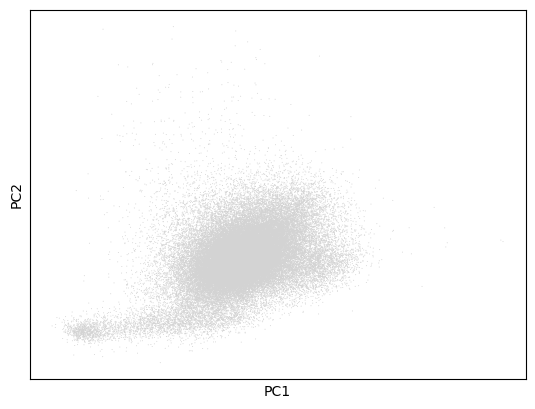

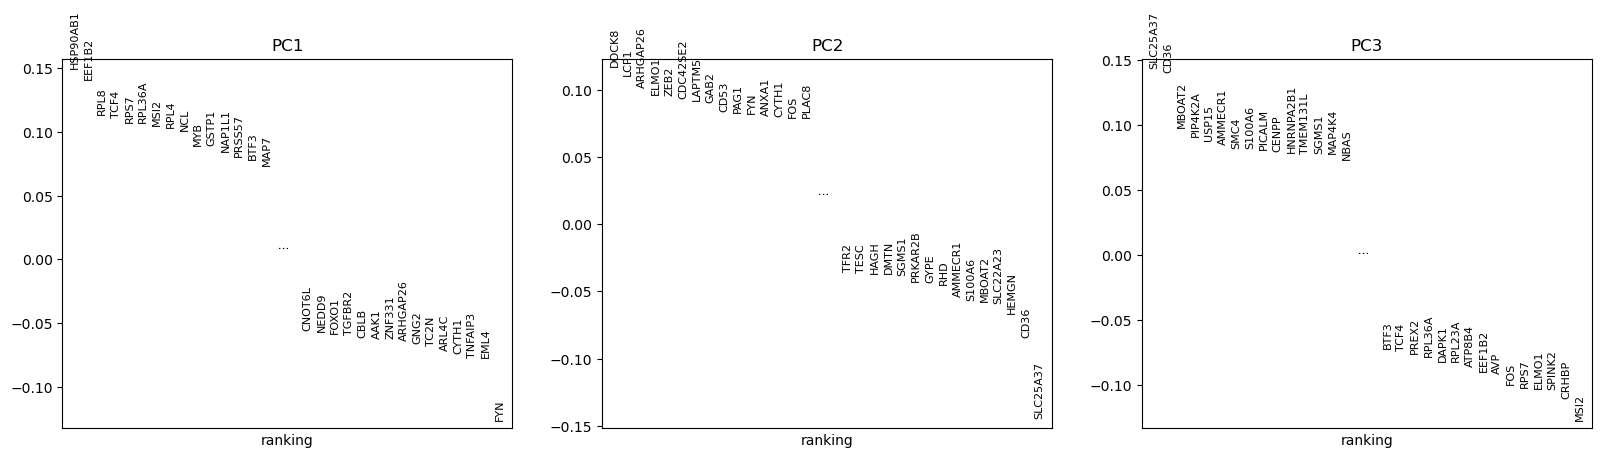

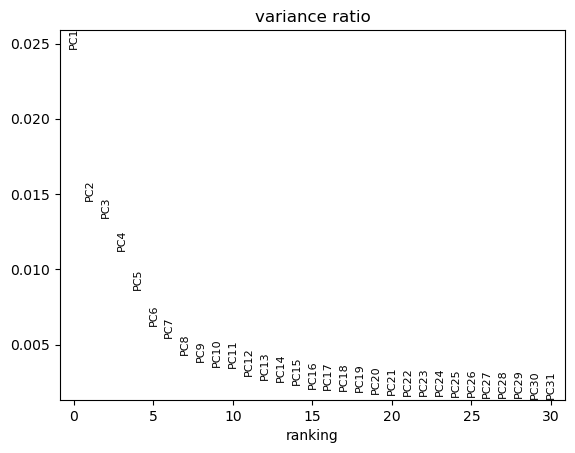

AnnData object with n_obs × n_vars = 60257 × 19038
    obs: 'n_genes', 'cell_type', 'dataset', 'organ_tissue', 'compartment', 'n_counts'
    var: 'gene_name', 'ensemble_id', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'ensembl_id', 'n_counts'
    uns: 'HSC_vs_FB', 'HSC_vs_FB_pure', 'fb_vs_hsc_up', 'go_annotations', 'hsc_v_fib_up', 'hvg', 'log1p', 'neighbors', 'panglaodb', 'pca', 'scenic_transcription_factors', 'scrublet', 'tabula_sapiens_deg', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [3]:
pdf = adata.copy()

data = [
    'pellin',
    'iHSC',
    'young2_HSC',
    'tabula_sapiens',
]

mask = pdf.obs['dataset'].isin(data)
pdf = pdf[mask, :]

# drop HSC from tabula
mask = (pdf.obs['celltype'] == 'HSC') & (pdf.obs['dataset'] == 'tabula_sapiens')
pdf = pdf[~mask, :]


keep_cols = [
    'n_genes',
    'cell_type',
    'dataset',
    'organ_tissue',
    'compartment',
]

pdf.obs = pdf.obs[keep_cols]

sc.pp.filter_genes(pdf, min_counts=3)
sc.pp.filter_cells(pdf, min_counts=100)

sc.pl.pca_overview(pdf)

pdf

In [4]:
pdf.obs['dataset'].value_counts()

dataset
tabula_sapiens    26586
pellin            21394
iHSC               8574
young2_HSC         3703
Name: count, dtype: int64

In [5]:
pdf.obs['cell_type'].value_counts()

cell_type
FB                        26586
iHSC                       8574
LinNegCD34PosCD164Pos      6343
HSC                        4525
LinNegCD34NegCD164high     4428
LinNegCD34lowCD164high     4265
CMP                        1576
MEP                        1211
GMP                        1012
MPP                         611
PreBNK                      592
LinNegCD34NegCD164low       347
MLP                         123
MKP                          64
Name: count, dtype: int64

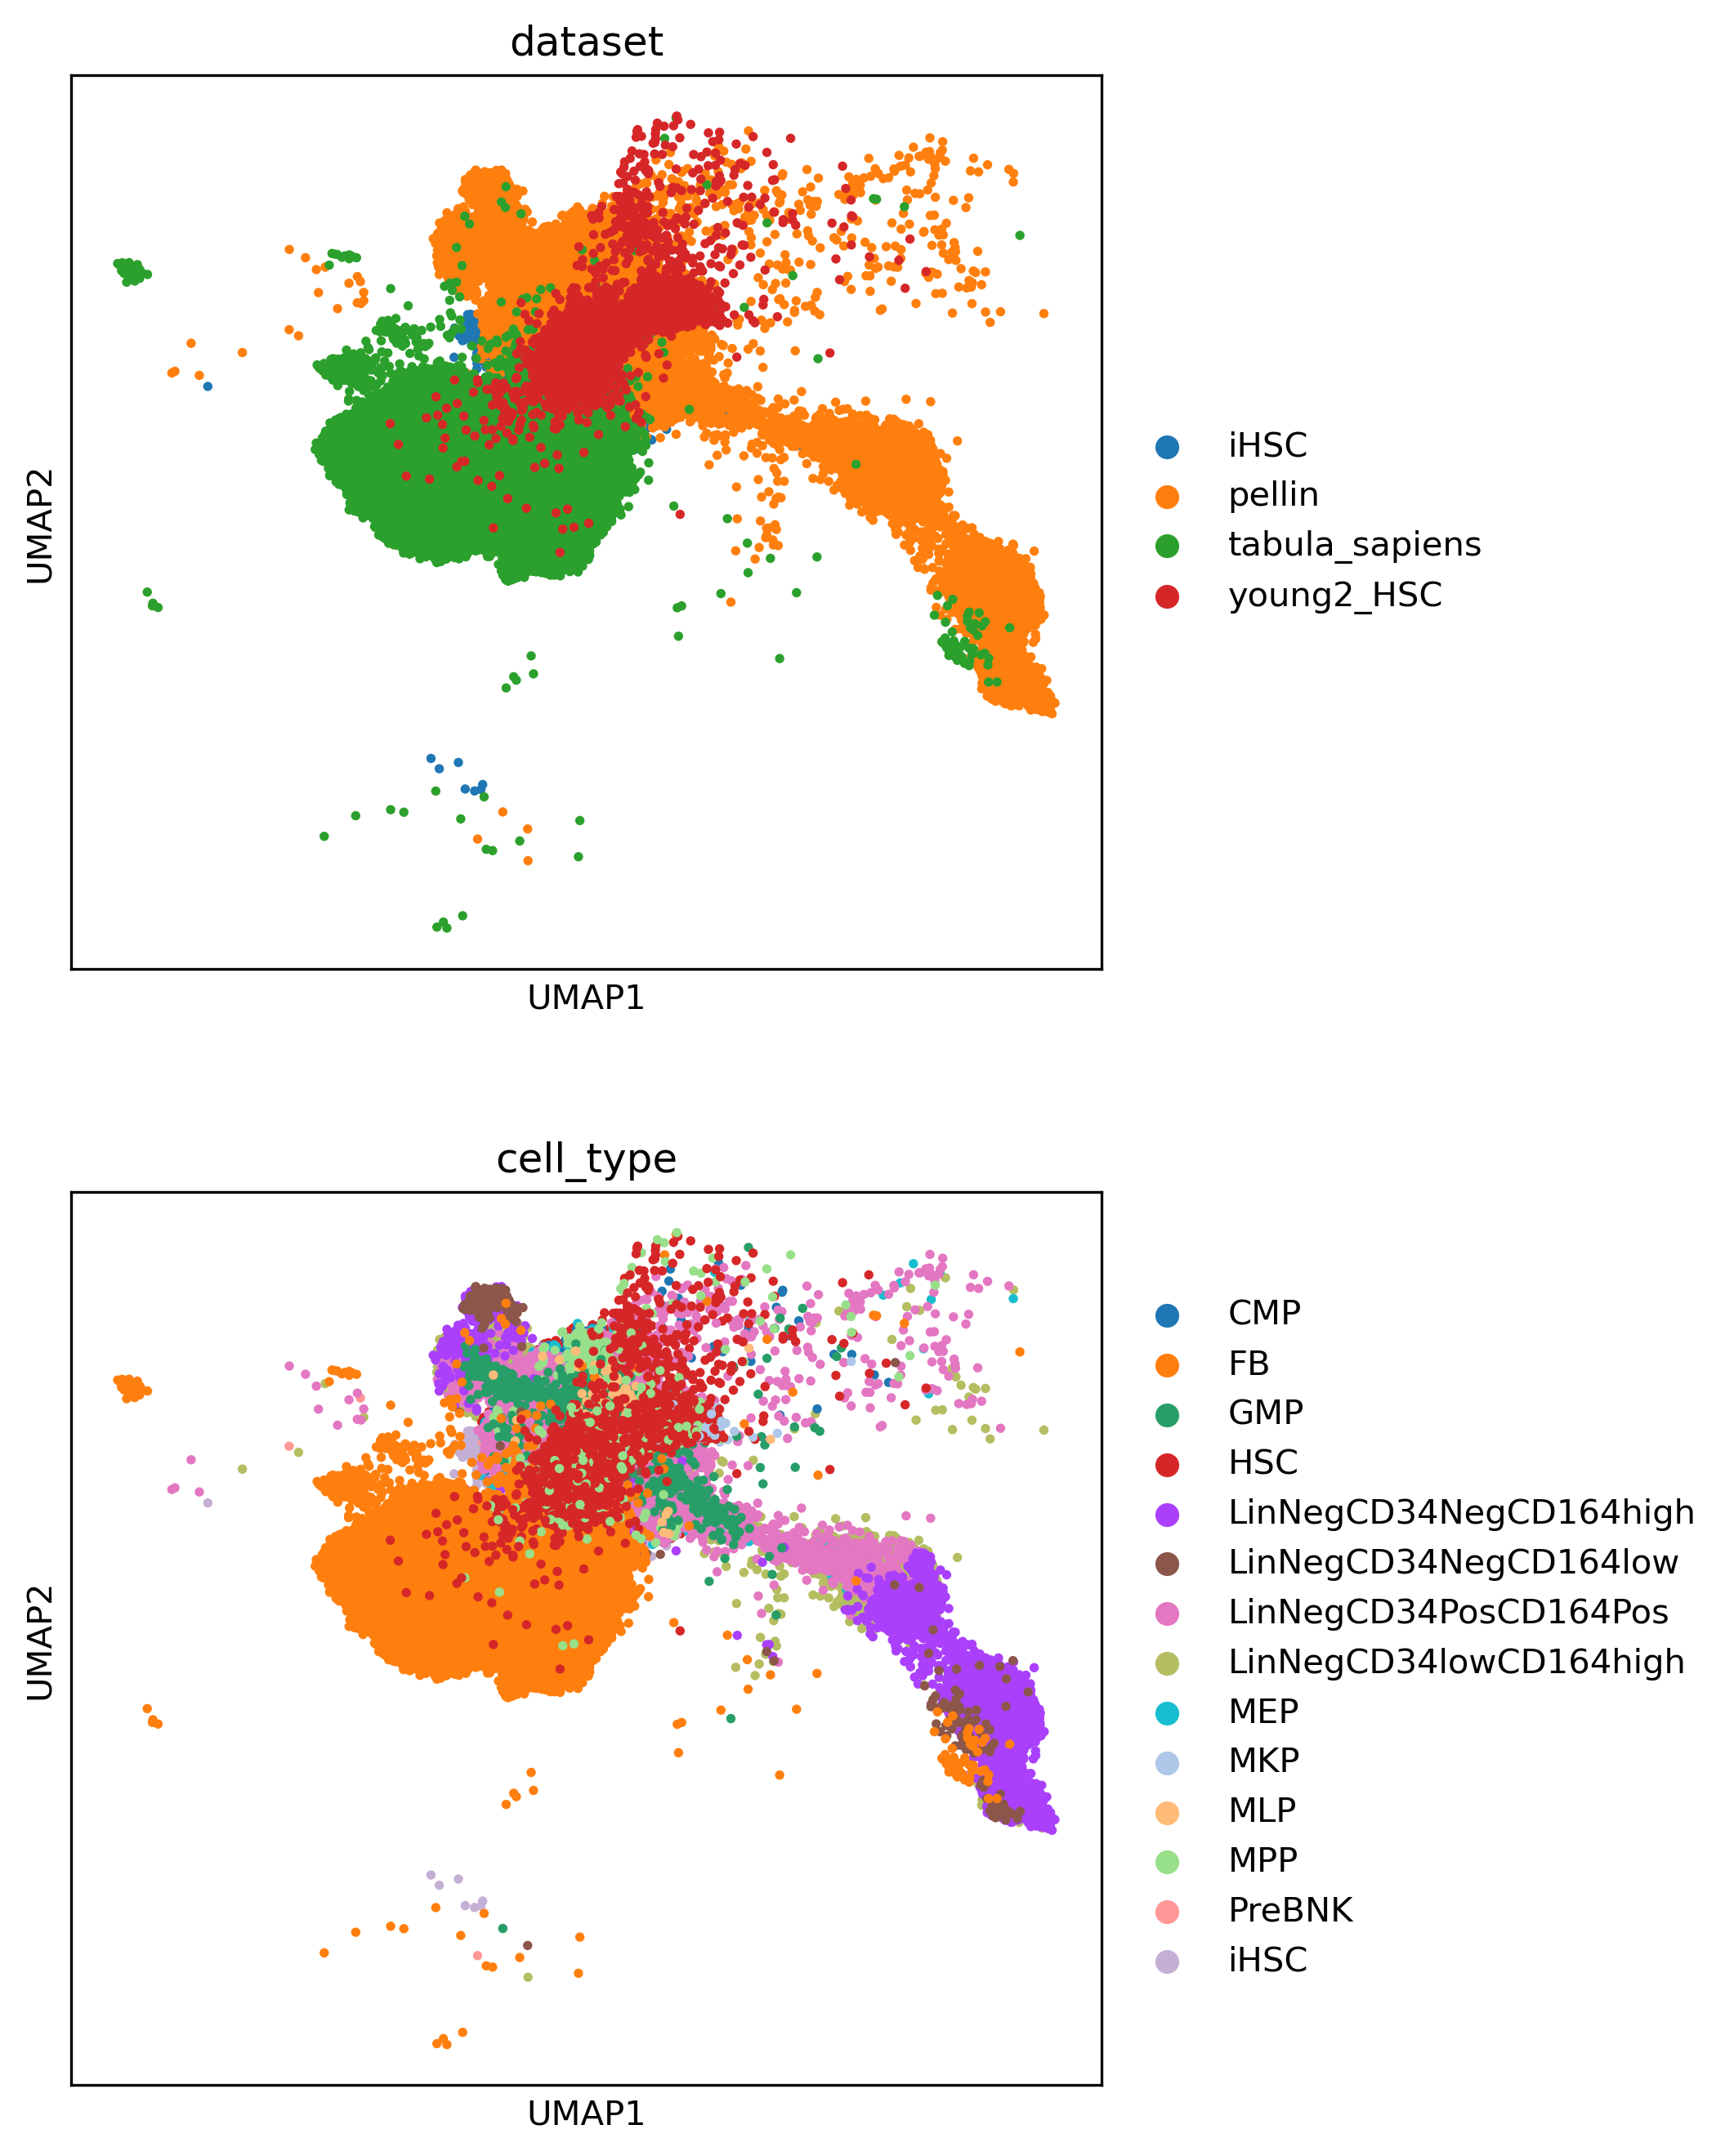

In [6]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

sc.pl.umap(pdf, 
           color=['dataset','cell_type'],
           ncols=1,
           s=30,)

In [7]:
# break

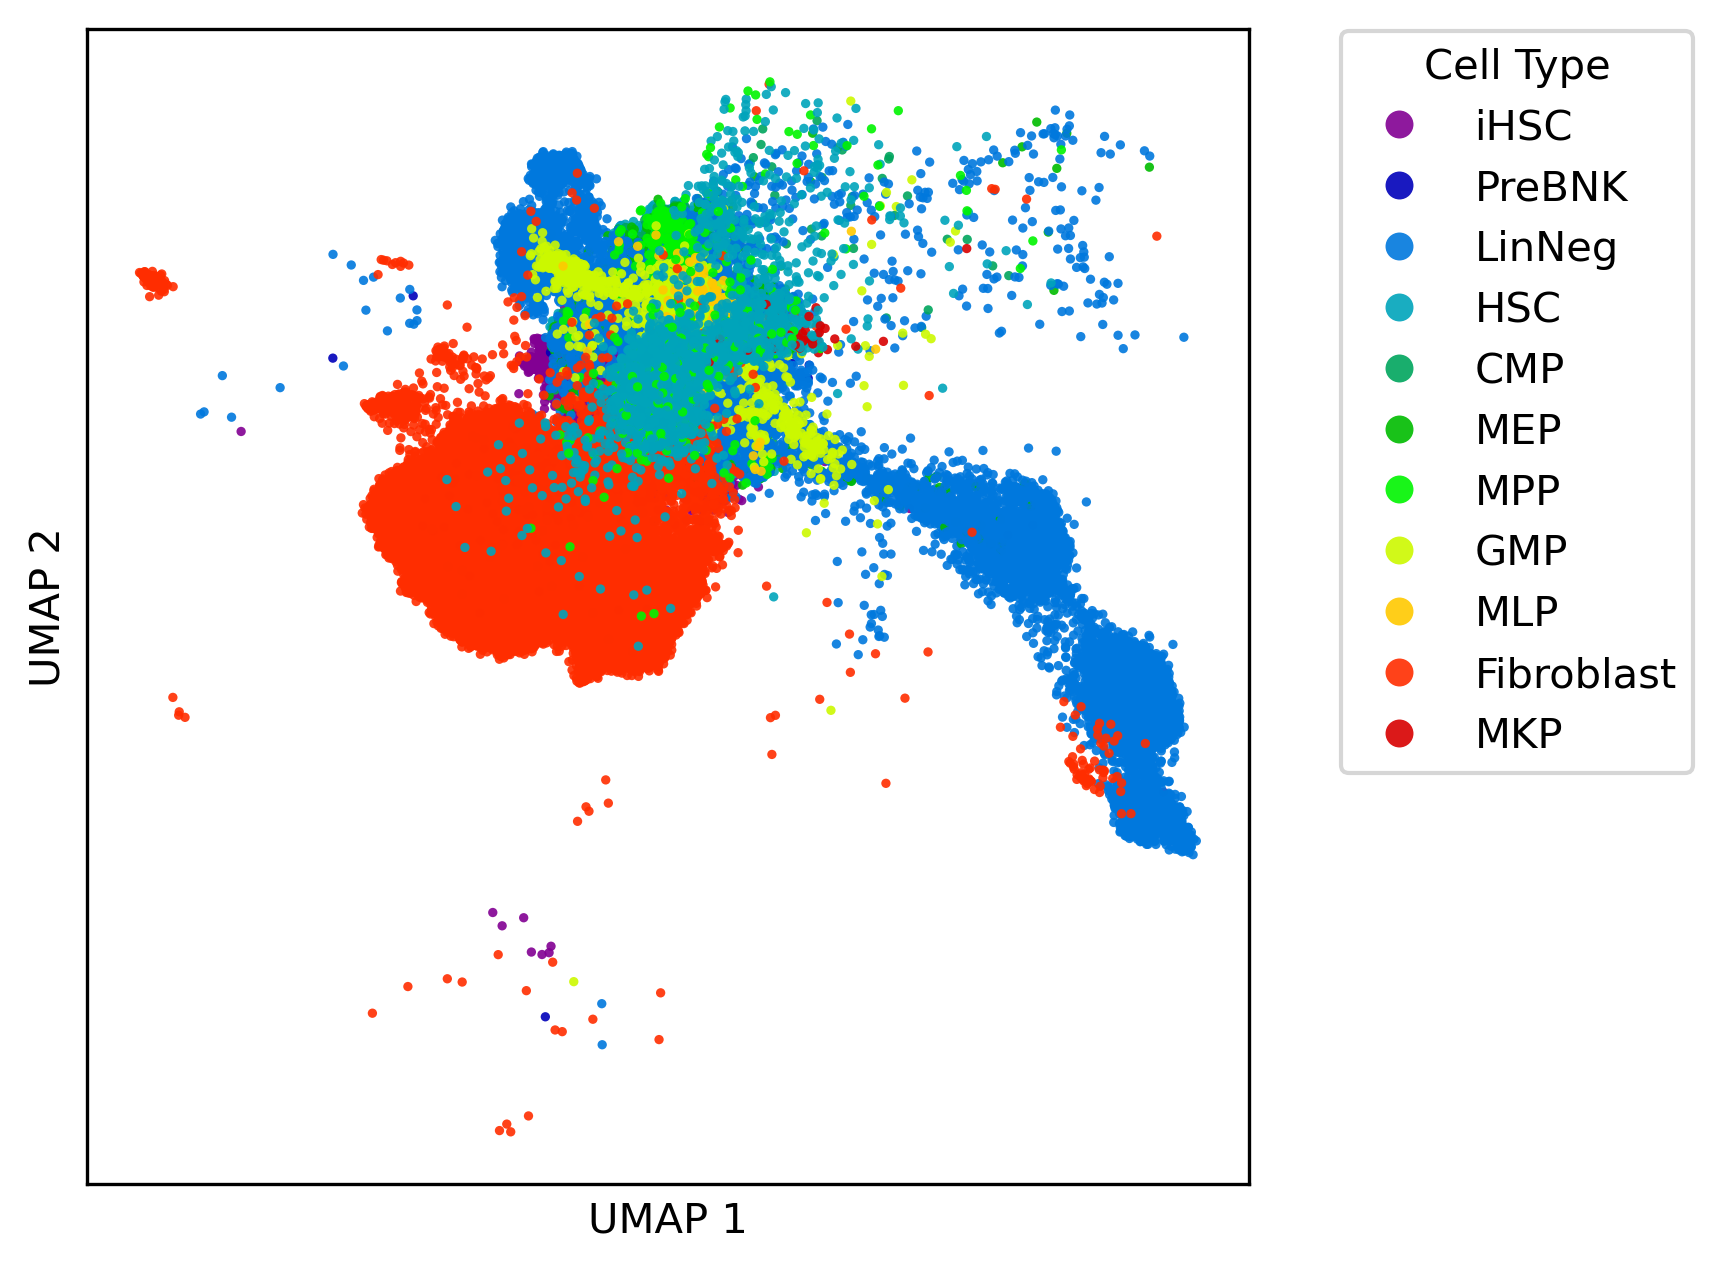

In [8]:
pdf.obs['UMAP 1'] = pdf.obsm['X_umap'][:, 0]
pdf.obs['UMAP 2'] = pdf.obsm['X_umap'][:, 1]

cell_map = {
    'iHSC' : 'iHSC',
    'PreBNK' : 'PreBNK',
    'LinNegCD34lowCD164high' : 'LinNeg',
    'HSC' : 'HSC',
    'CMP' : 'CMP',
    'MEP' : 'MEP',
    'LinNegCD34PosCD164Pos' : 'LinNeg',
    'LinNegCD34NegCD164high' : 'LinNeg',
    'MPP' : "MPP",
    'GMP' : "GMP",
    'LinNegCD34NegCD164low' : 'LinNeg',
    'MLP' : "MLP",
    'FB' : "Fibroblast",
    'MKP' : "MKP"
}

pdf.obs['broad_type'] = pdf.obs['cell_type'].map(cell_map)


plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

sns.scatterplot(data=pdf.obs,
                x='UMAP 1',
                y='UMAP 2',
                ec='none',
                lw=0.1,
                alpha=0.9,
                hue='broad_type',
                palette="nipy_spectral",
                s=5)


plt.xticks([])
plt.yticks([])

sns.move_legend(plt.gca(), 
                title="Cell Type",
                loc='upper right',
                markerscale=3,
                bbox_to_anchor=(1.4, 1.017))

plt.gca().set_aspect('auto')

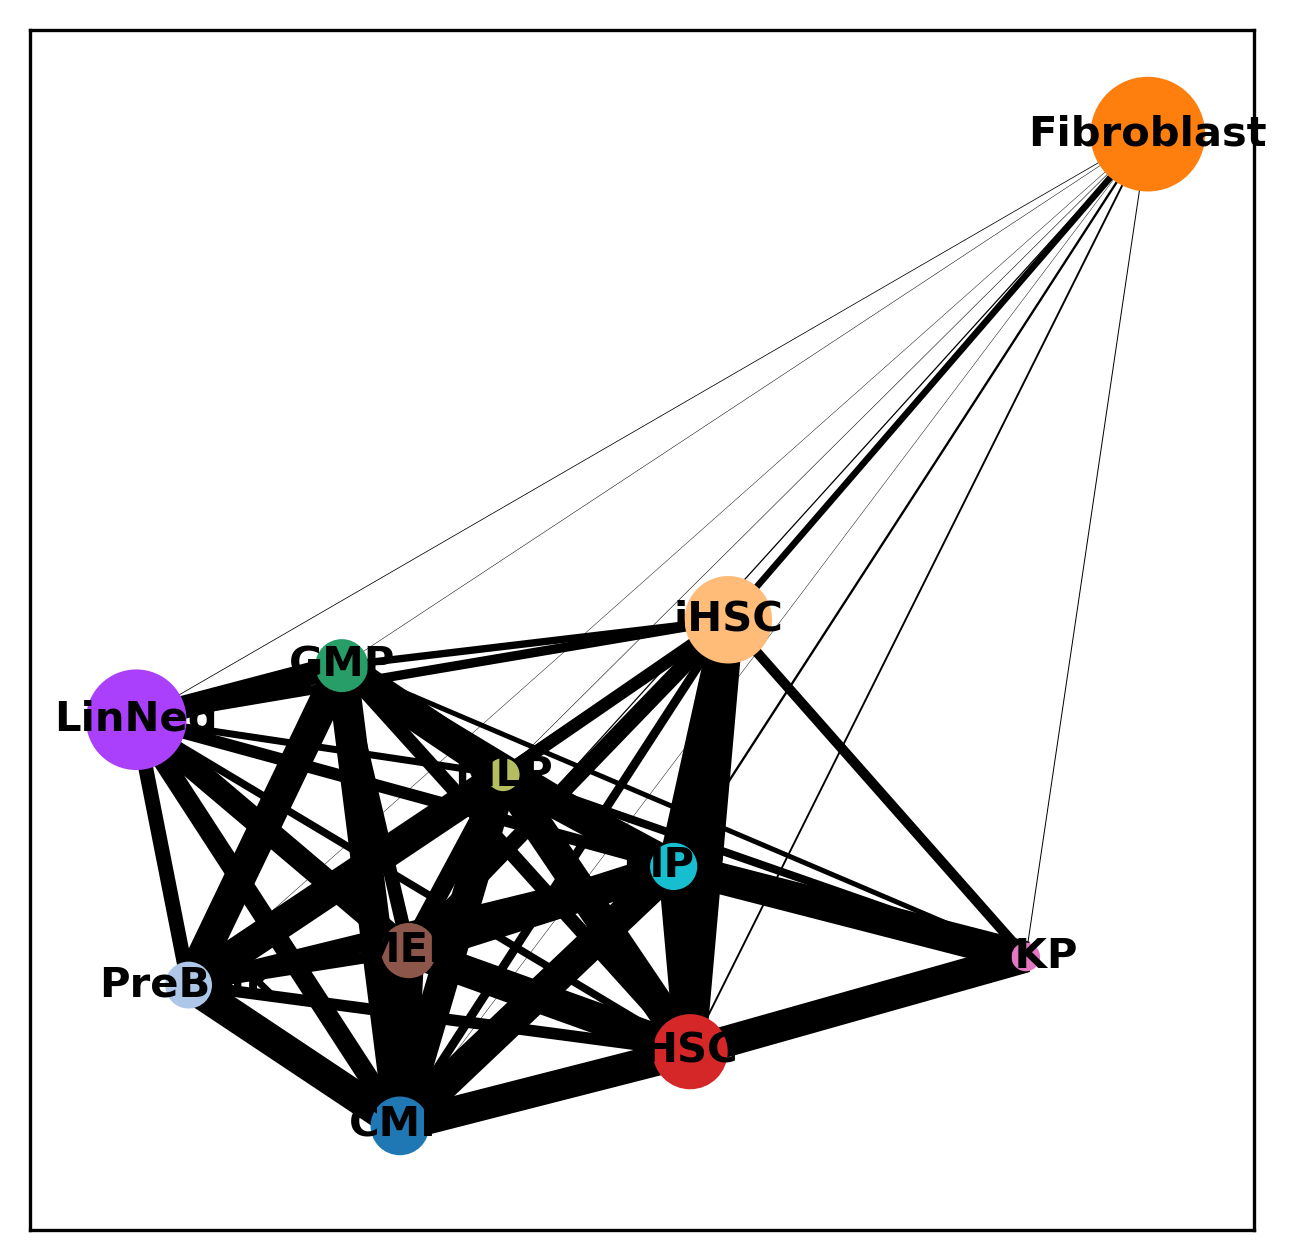

/home/cstansbu/miniconda3/envs/scanpy/lib/python3.12/site-packages/umap/umap_.py:1393: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


In [9]:
sc.tl.paga(pdf, groups="broad_type")
sc.pl.paga(pdf, color=["broad_type"])
sc.tl.umap(pdf, init_pos='paga', min_dist=0.1, spread=5.0)

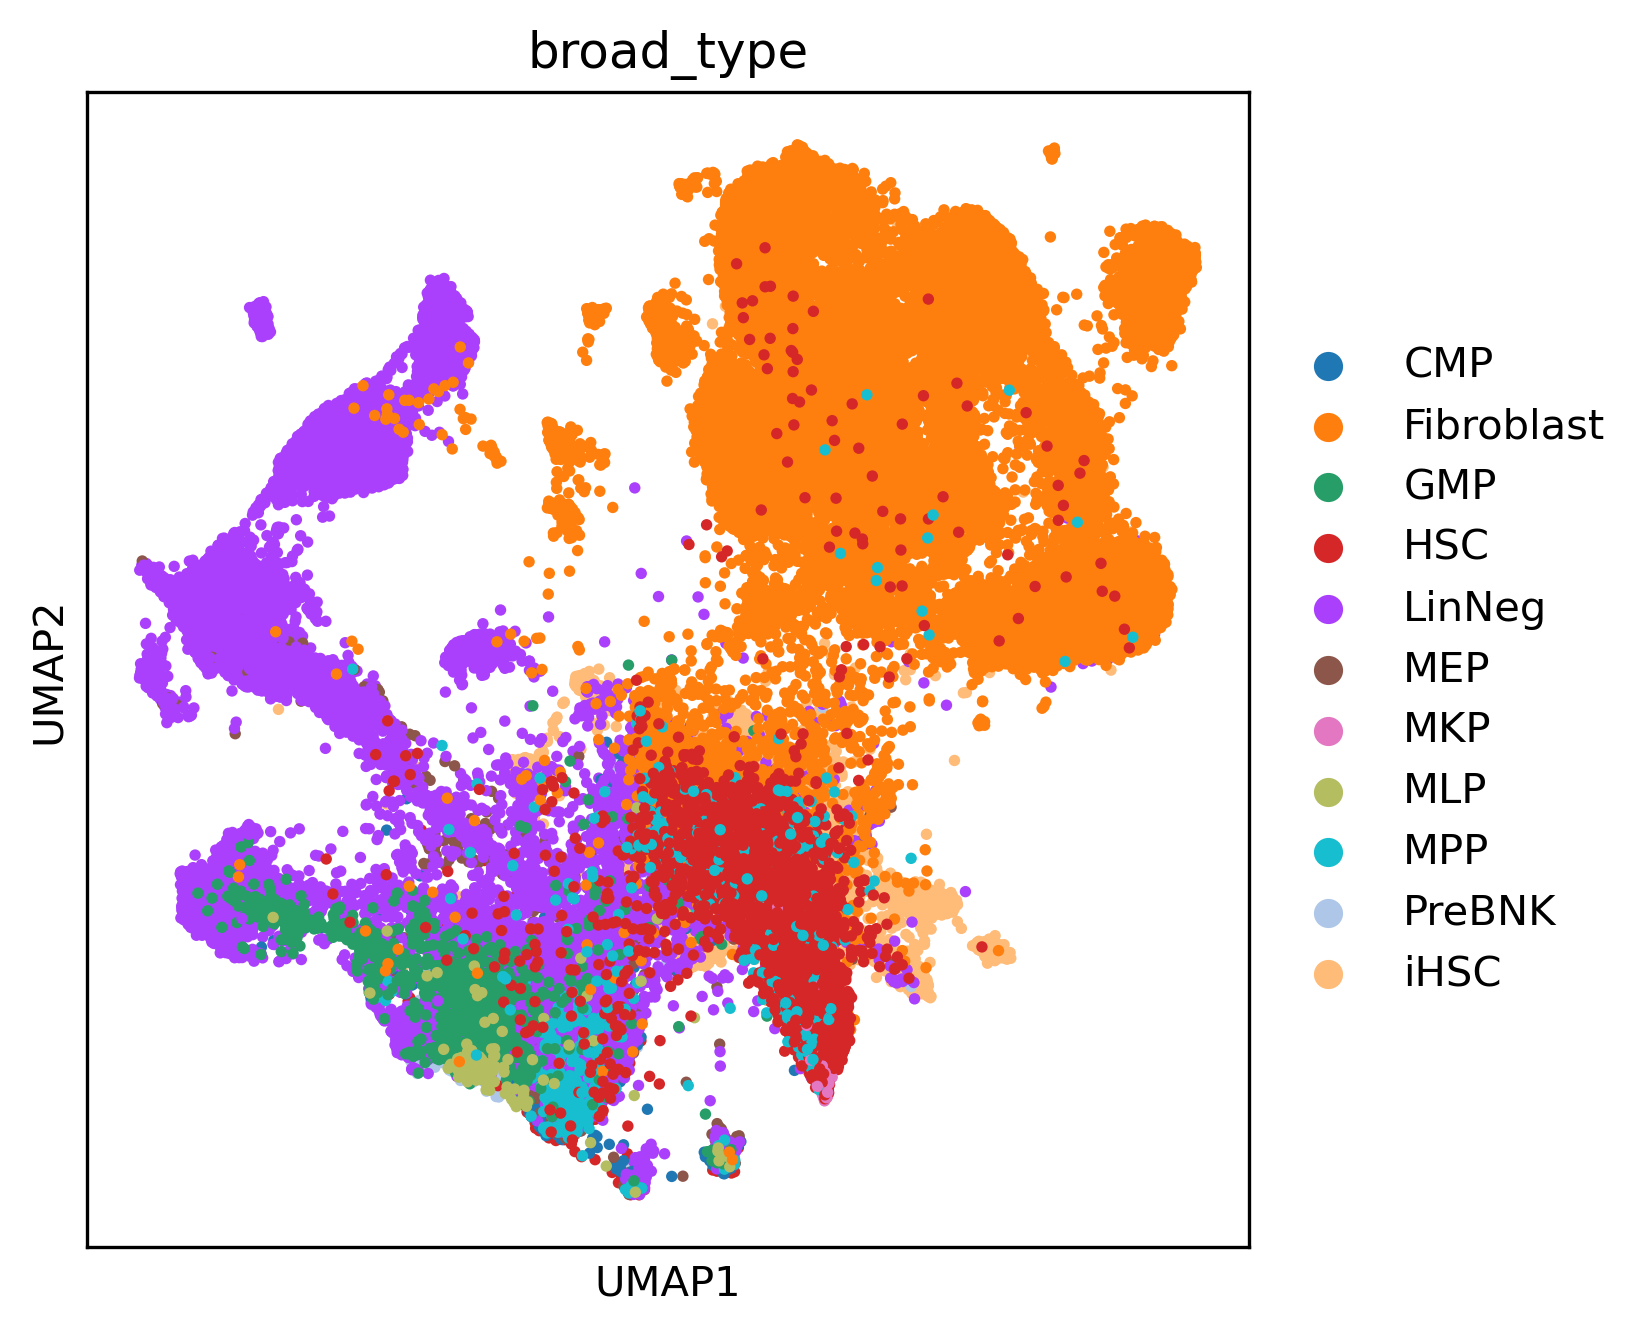

In [10]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

sc.pl.umap(pdf, 
           color='broad_type',
           ncols=1,
           s=30,)

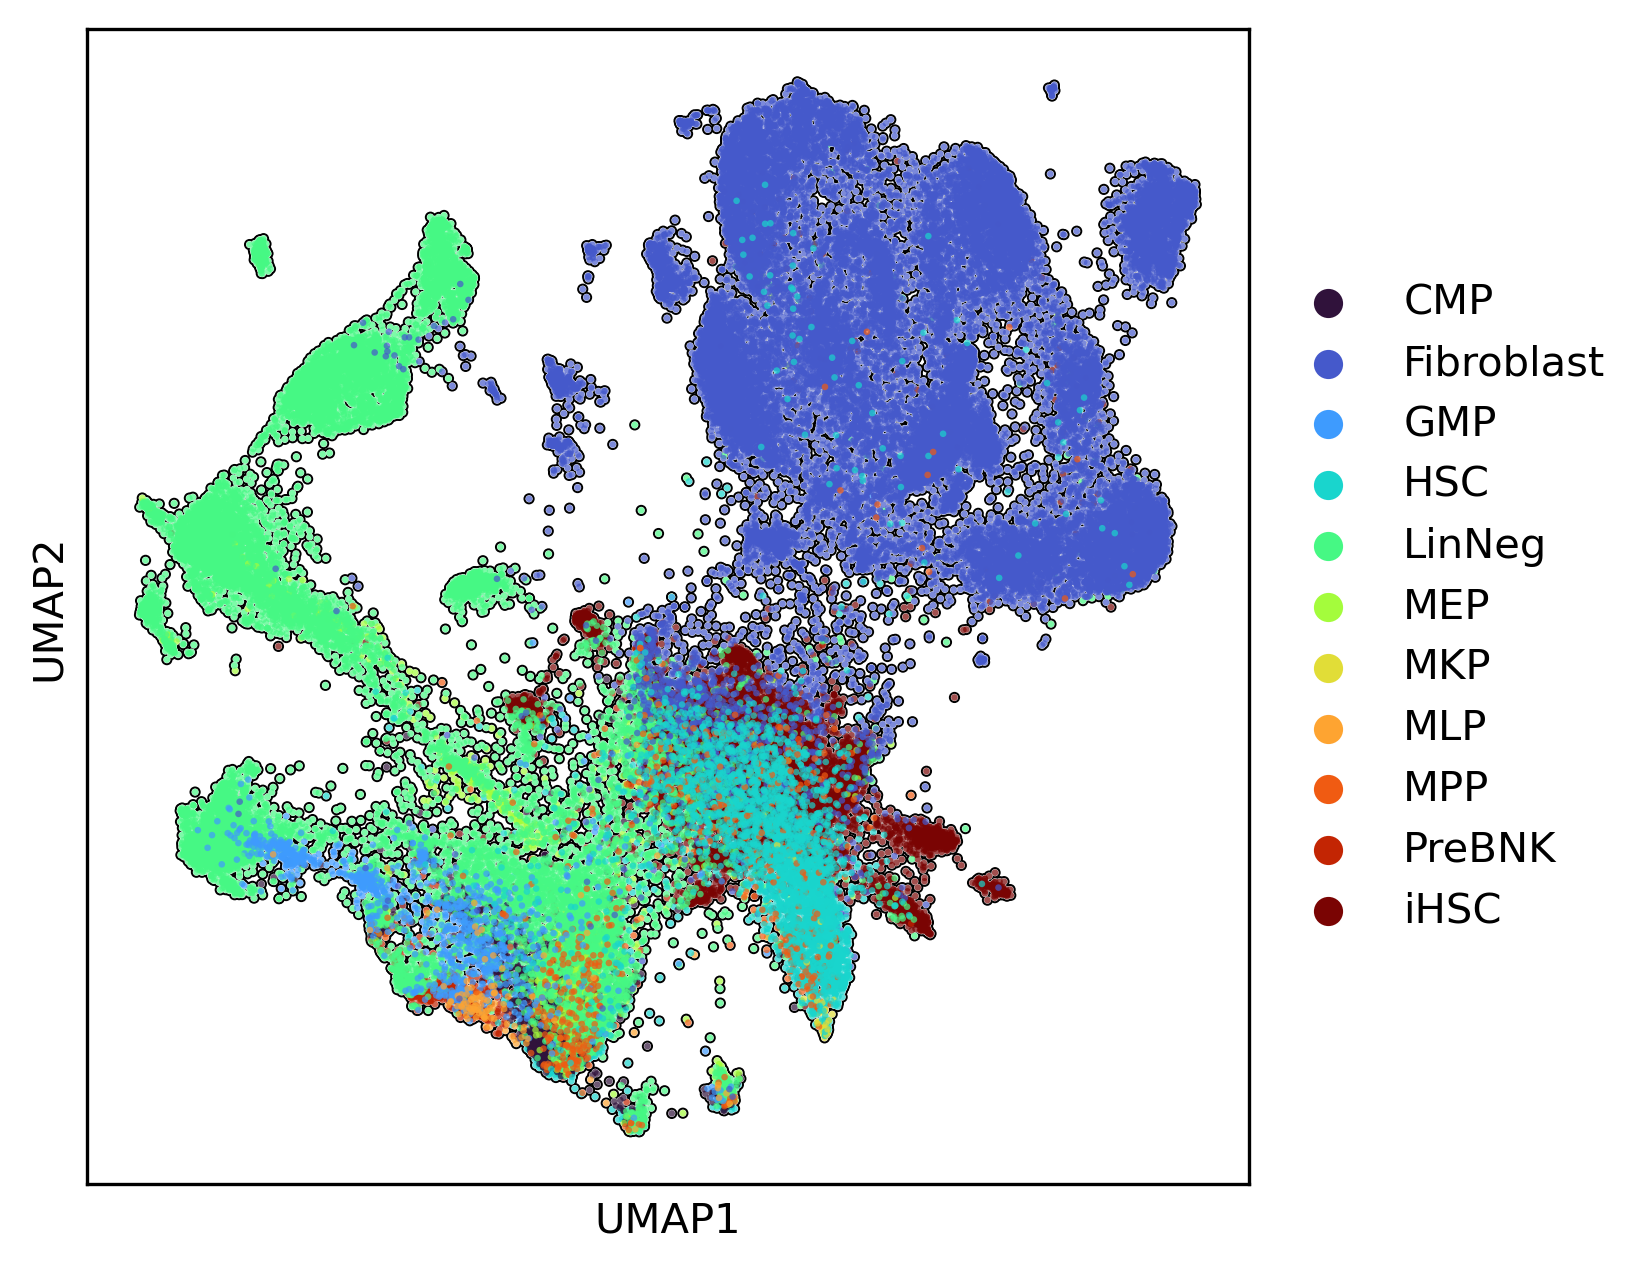

In [11]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5


sc.pl.umap(pdf, 
           color='broad_type',
           palette='turbo',
           s=10,
           title="",
           add_outline=True)

In [12]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

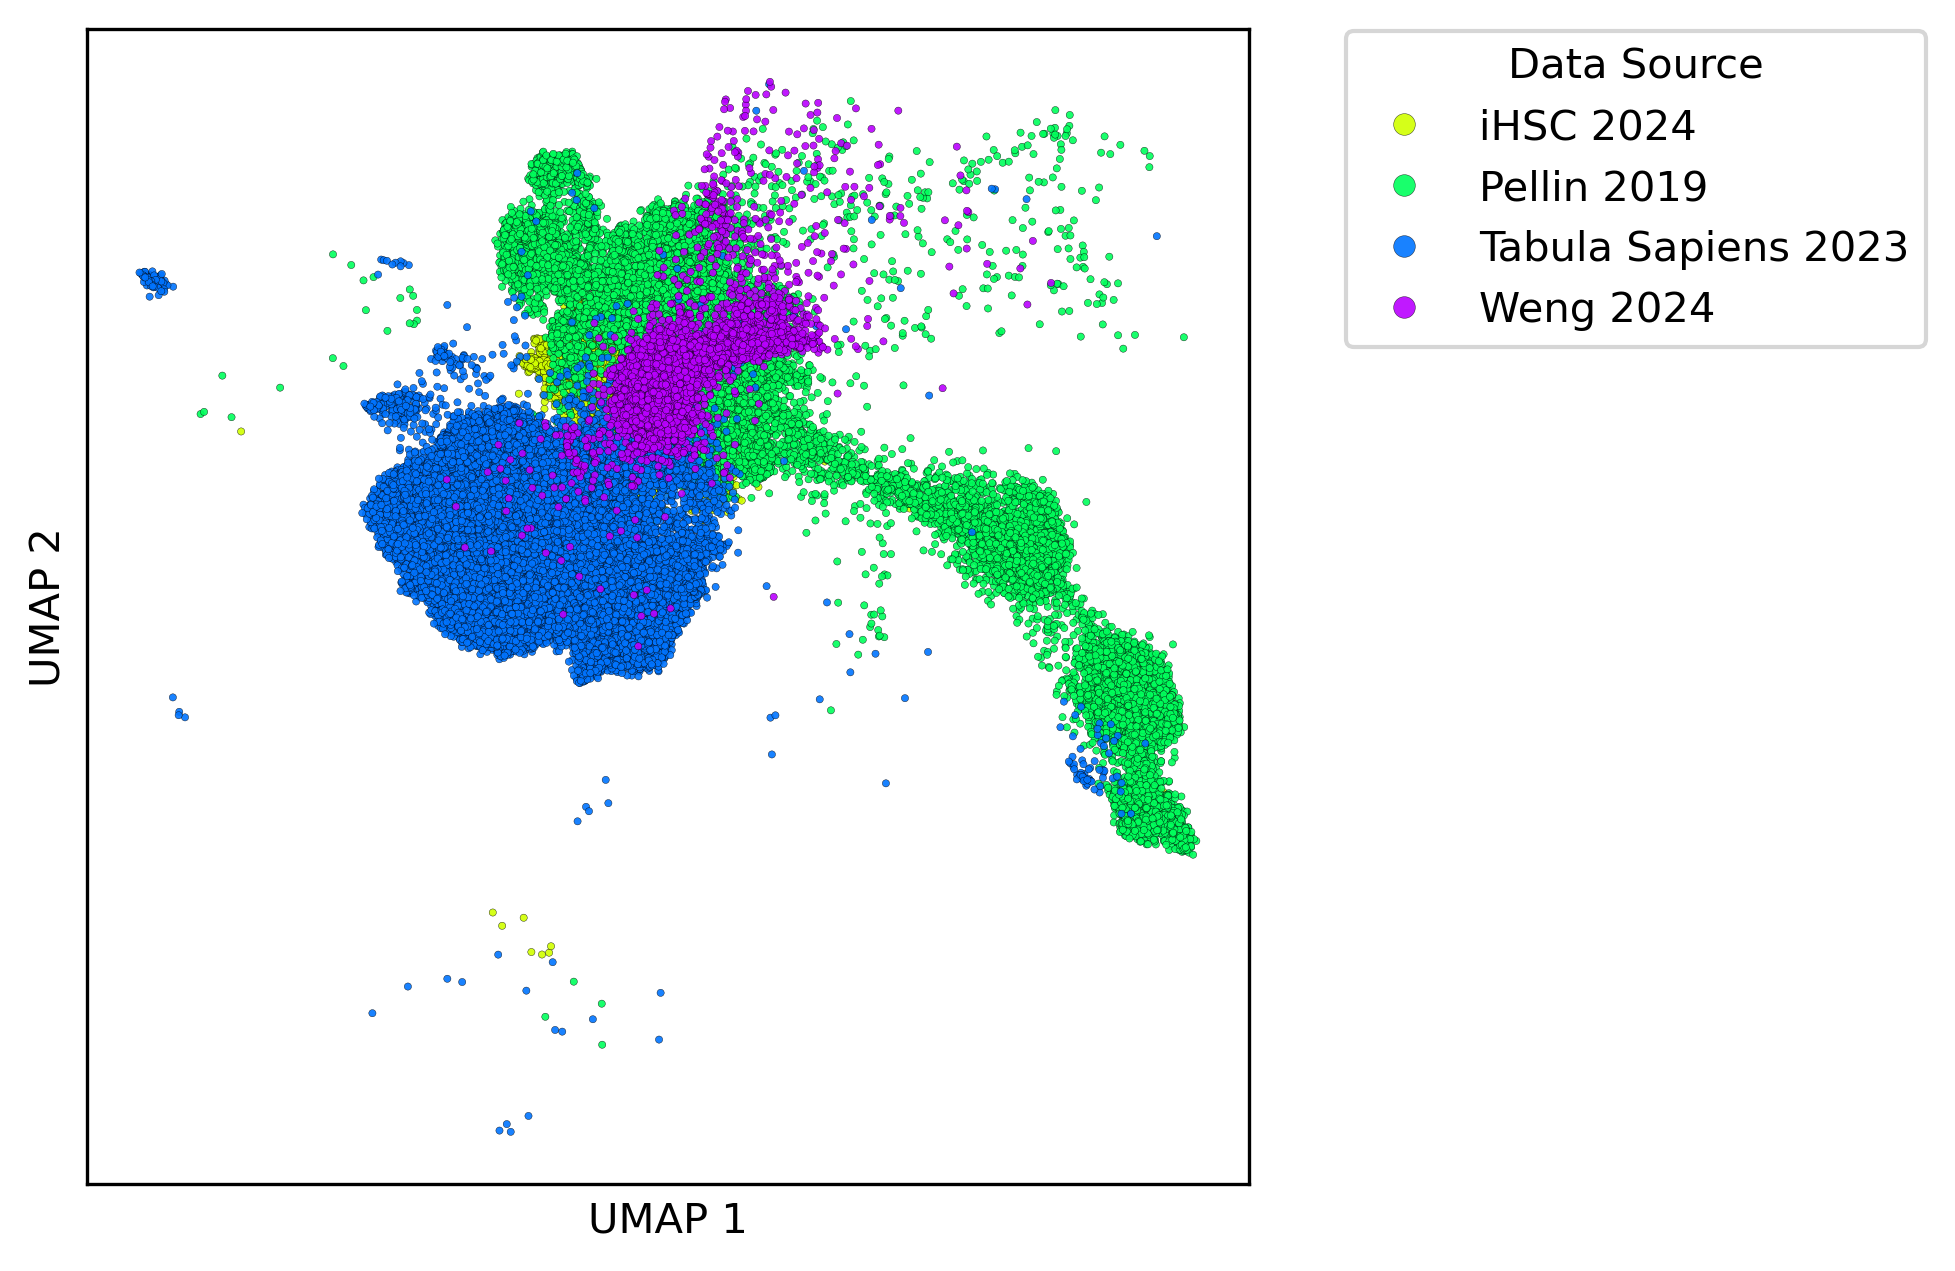

In [13]:

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

data_map = {
    'iHSC' : 'iHSC 2024', 
    'pellin' : 'Pellin 2019', 
    'tabula_sapiens' : 'Tabula Sapiens 2023',
    'young2_HSC' : 'Weng 2024',
}

pdf.obs['Data Source'] = pdf.obs['dataset'].map(data_map)

sns.scatterplot(data=pdf.obs,
                x='UMAP 1',
                y='UMAP 2',
                ec='k',
                lw=0.1,
                alpha=0.9,
                hue='Data Source',
                palette="hsv",
                s=3)


plt.xticks([])
plt.yticks([])

sns.move_legend(plt.gca(), 
                title="Data Source",
                loc='upper right',
                markerscale=3,
                bbox_to_anchor=(1.6, 1.017))

plt.gca().set_aspect('auto')

/tmp/ipykernel_202581/2917993896.py:20: UserWarning: 
The palette list has fewer values (3) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=to_plot,


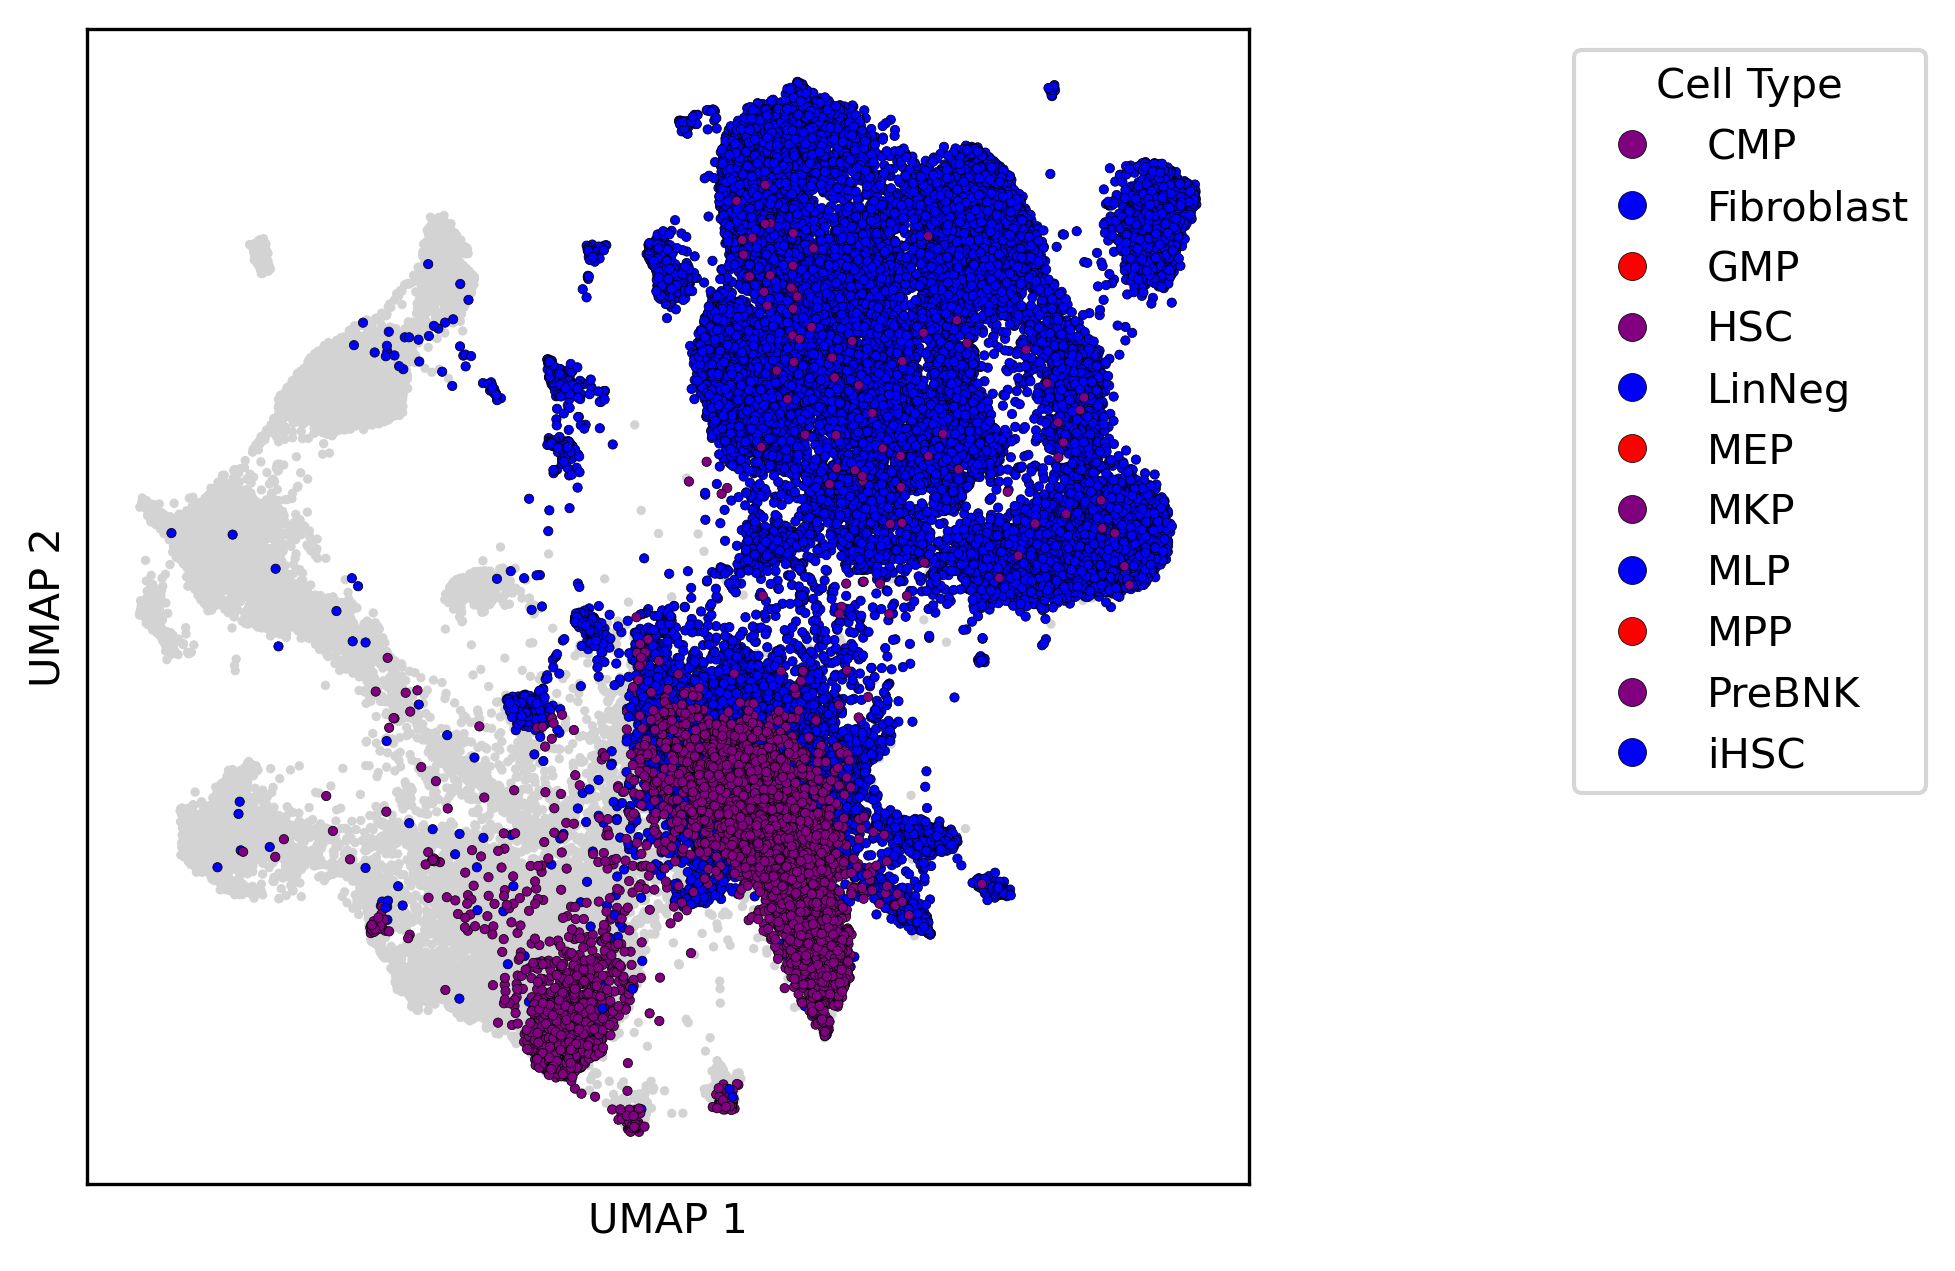

In [14]:
pdf.obs['UMAP 1'] = pdf.obsm['X_umap'][:, 0]
pdf.obs['UMAP 2'] = pdf.obsm['X_umap'][:, 1]

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

sns.scatterplot(data=pdf.obs,
                x='UMAP 1',
                y='UMAP 2',
                ec='None',
                zorder=0,
                color='lightgrey',
                s=5)


mask = pdf.obs['cell_type'].isin(["HSC", "iHSC", 'FB'])
to_plot = pdf.obs[mask].reset_index(drop=False).copy()
to_plot['cell_type'] = to_plot['cell_type'].astype(str)

sns.scatterplot(data=to_plot,
                x='UMAP 1',
                y='UMAP 2',
                ec='k',
                zorder=2,
                hue='broad_type',
                palette=['purple', "blue", "red"],
                s=5)

plt.xticks([])
plt.yticks([])

sns.move_legend(plt.gca(), 
                title="Cell Type",
                loc='upper right',
                markerscale=3,
                bbox_to_anchor=(1.6, 1))

plt.gca().set_aspect('auto')

In [ ]:
break

# Gene Expression

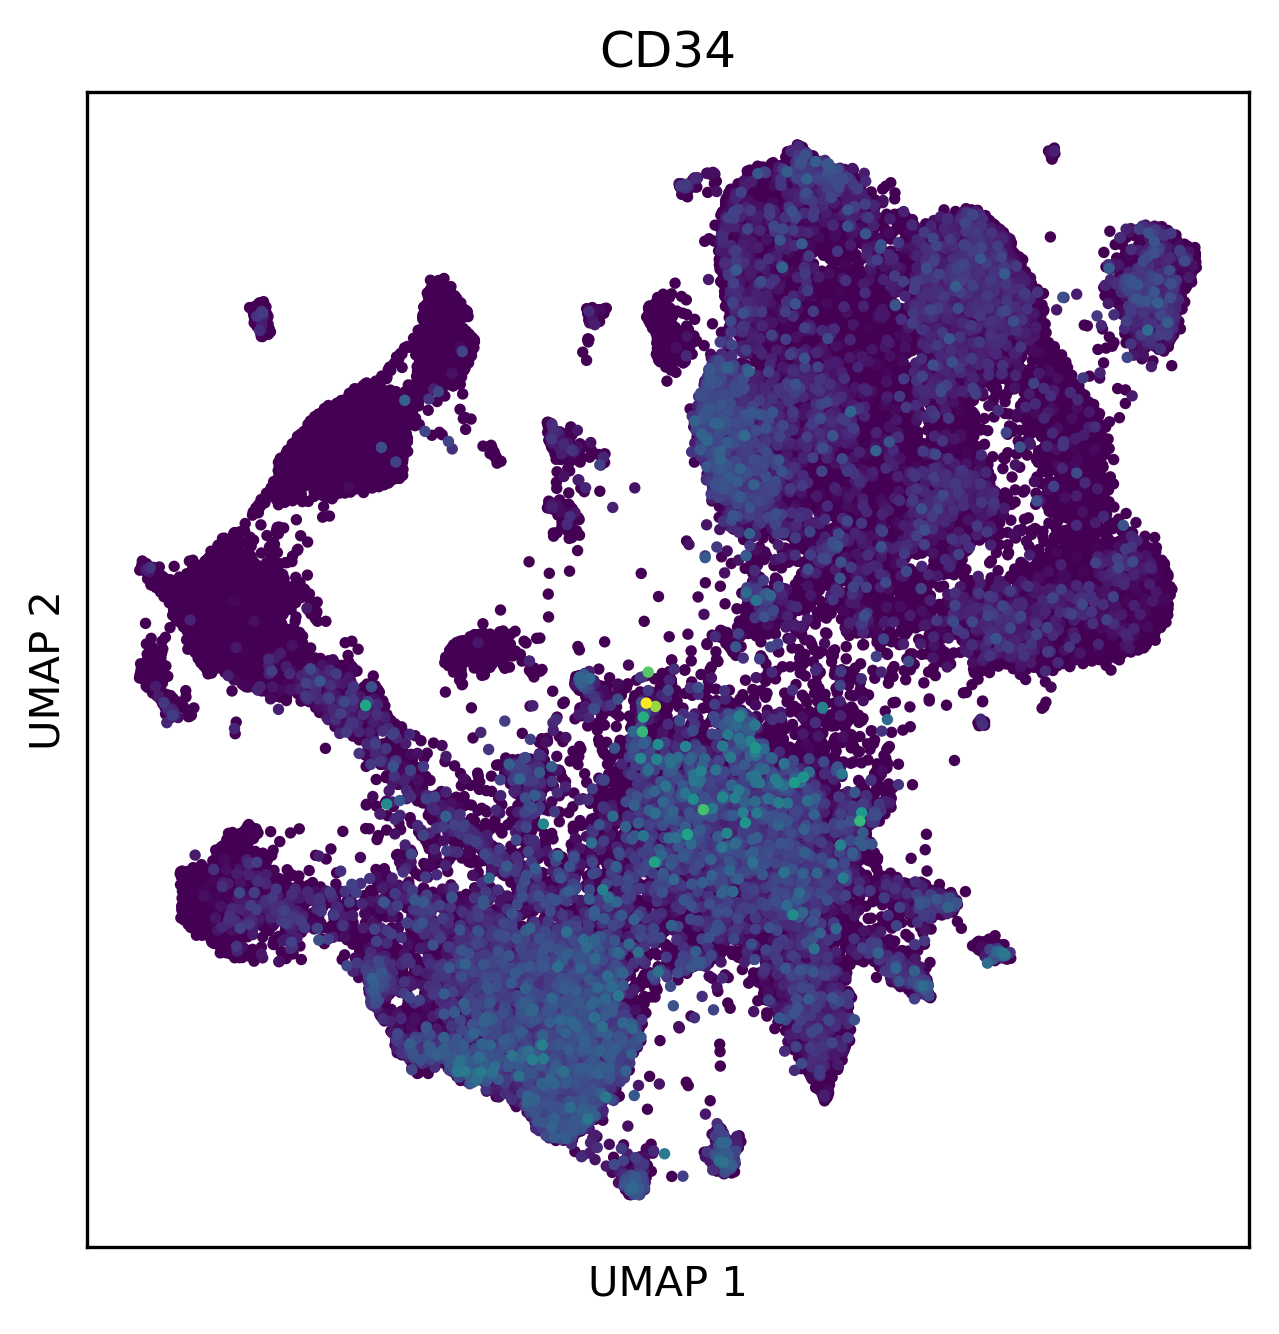

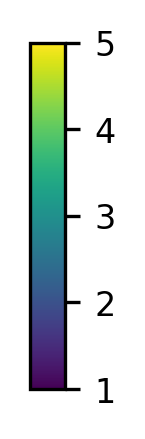

In [15]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(pdf, 
                       color='CD34',
                       vmin=1, 
                       vmax=5,
                       title='CD34', 
                       s=3,
                      )


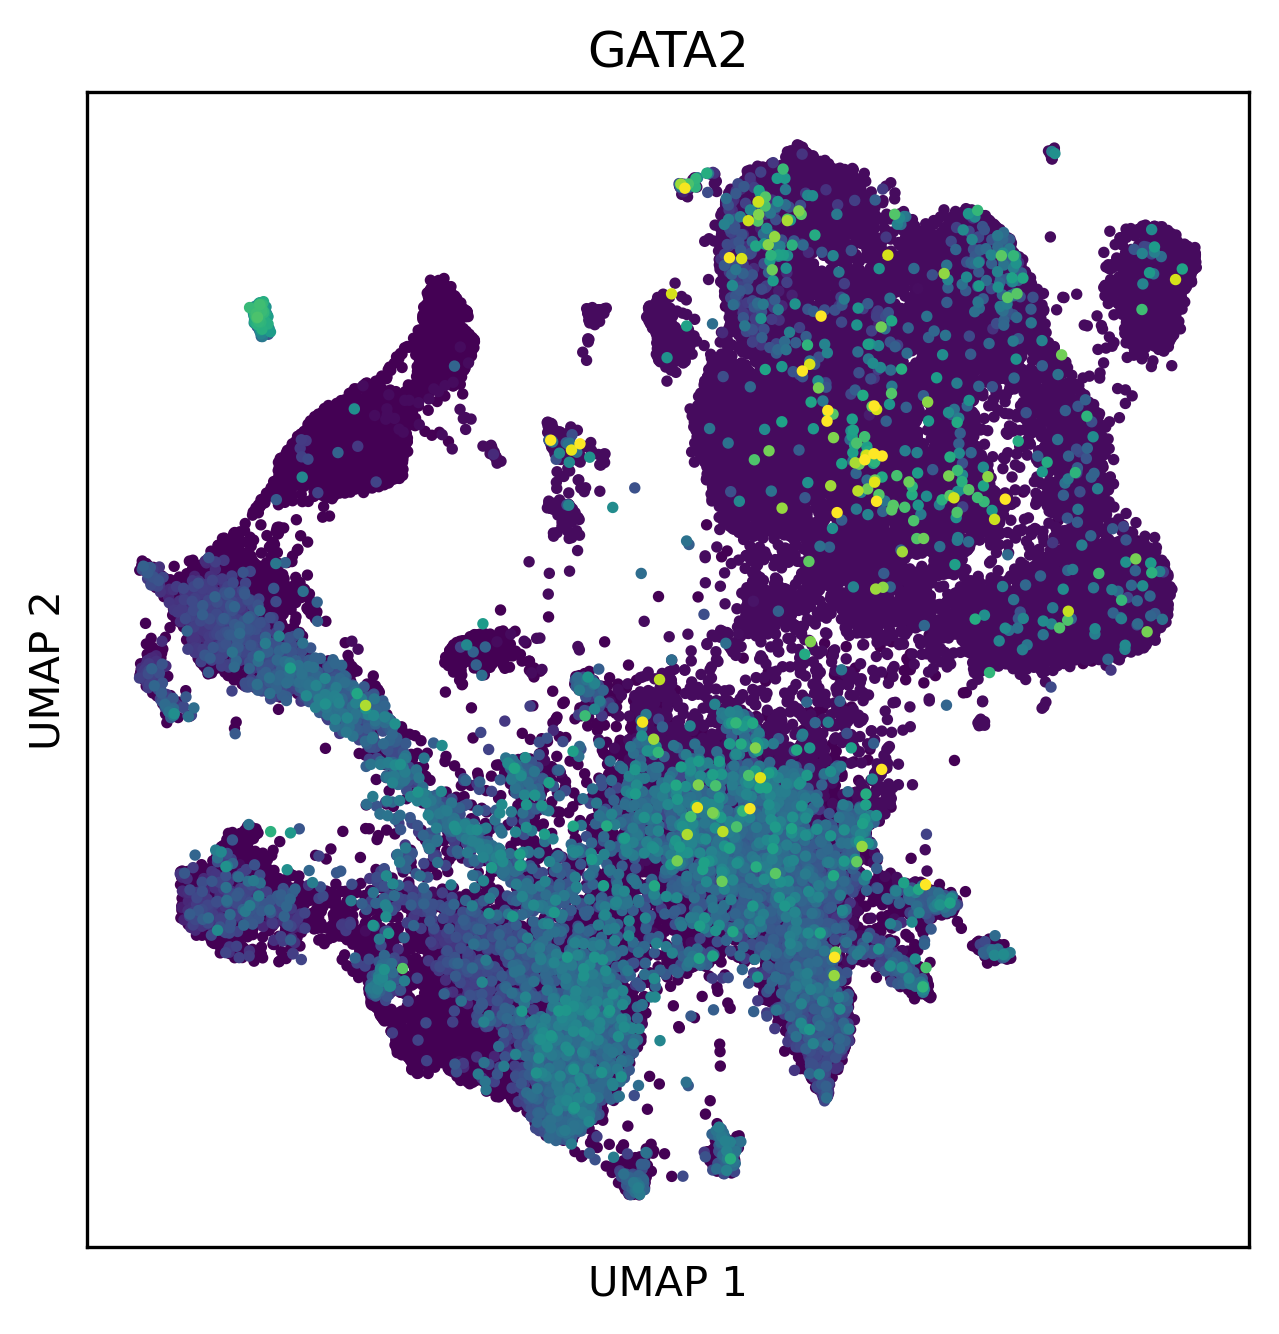

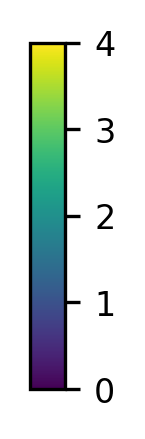

In [16]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(pdf, 
                       color='GATA2', 
                       title='GATA2',
                       vmin=0, 
                       vmax=4,
                       s=3)

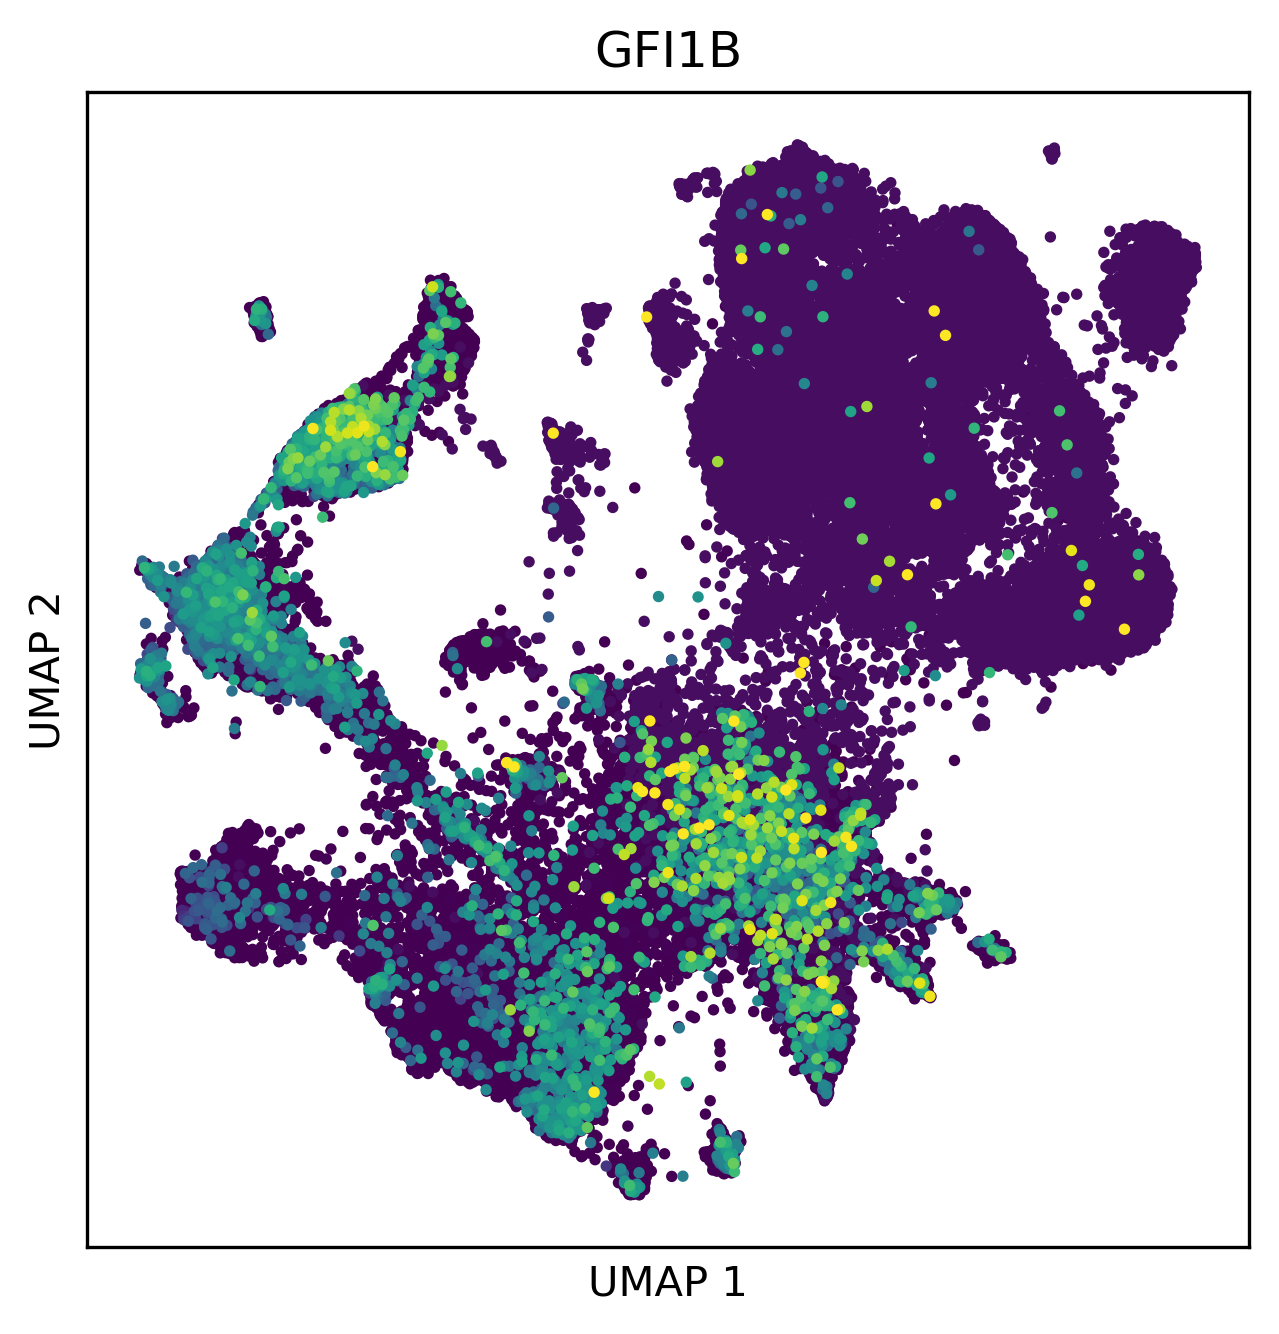

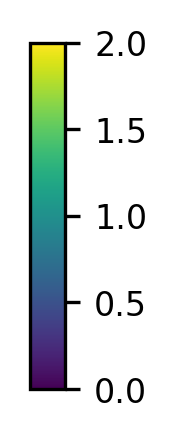

In [17]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(pdf, 
                       color='GFI1B', 
                       title='GFI1B',
                       vmin=0,
                       vmax=2, 
                       s=3)

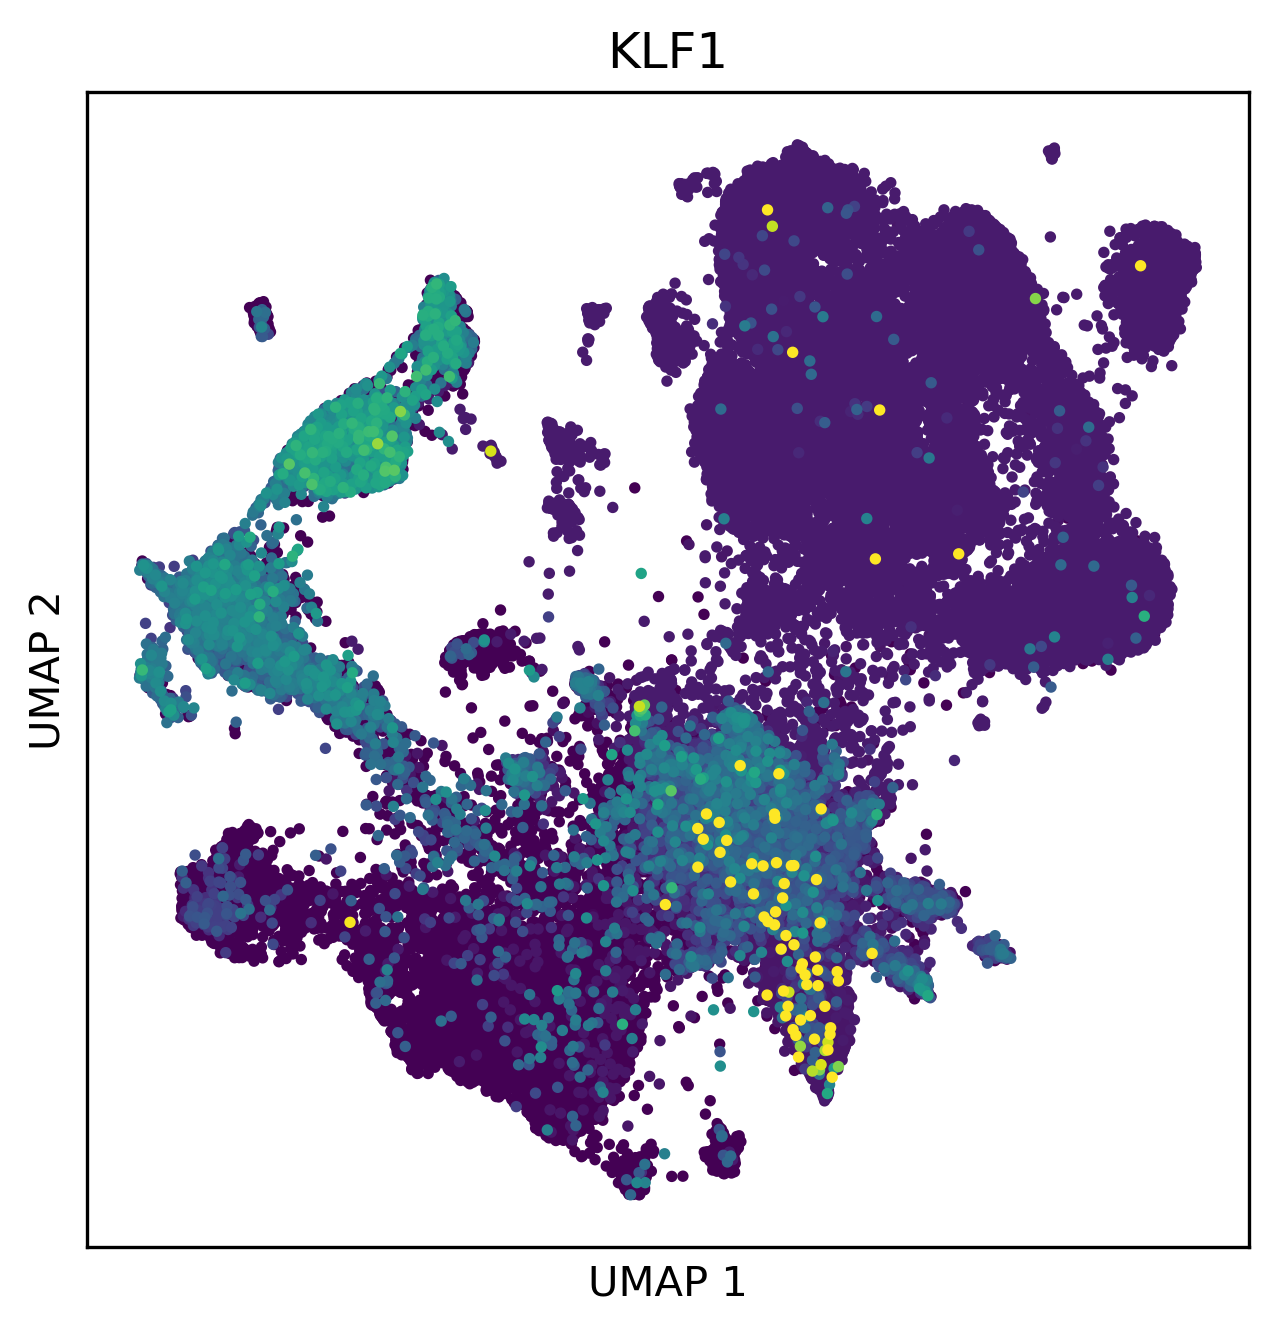

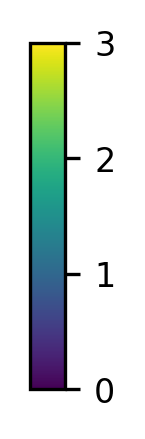

In [18]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5
plt2.plot_umap_scatter(pdf, color='KLF1', title='KLF1', vmin=0, vmax=3, s=3)

# Plot Basins

In [19]:
iHSC = pdf[pdf.obs['broad_type'] == 'iHSC', :]
HSC = pdf[pdf.obs['broad_type'] == 'HSC', :]
FB = pdf[pdf.obs['broad_type'] == 'Fibroblast', :]

([], [])

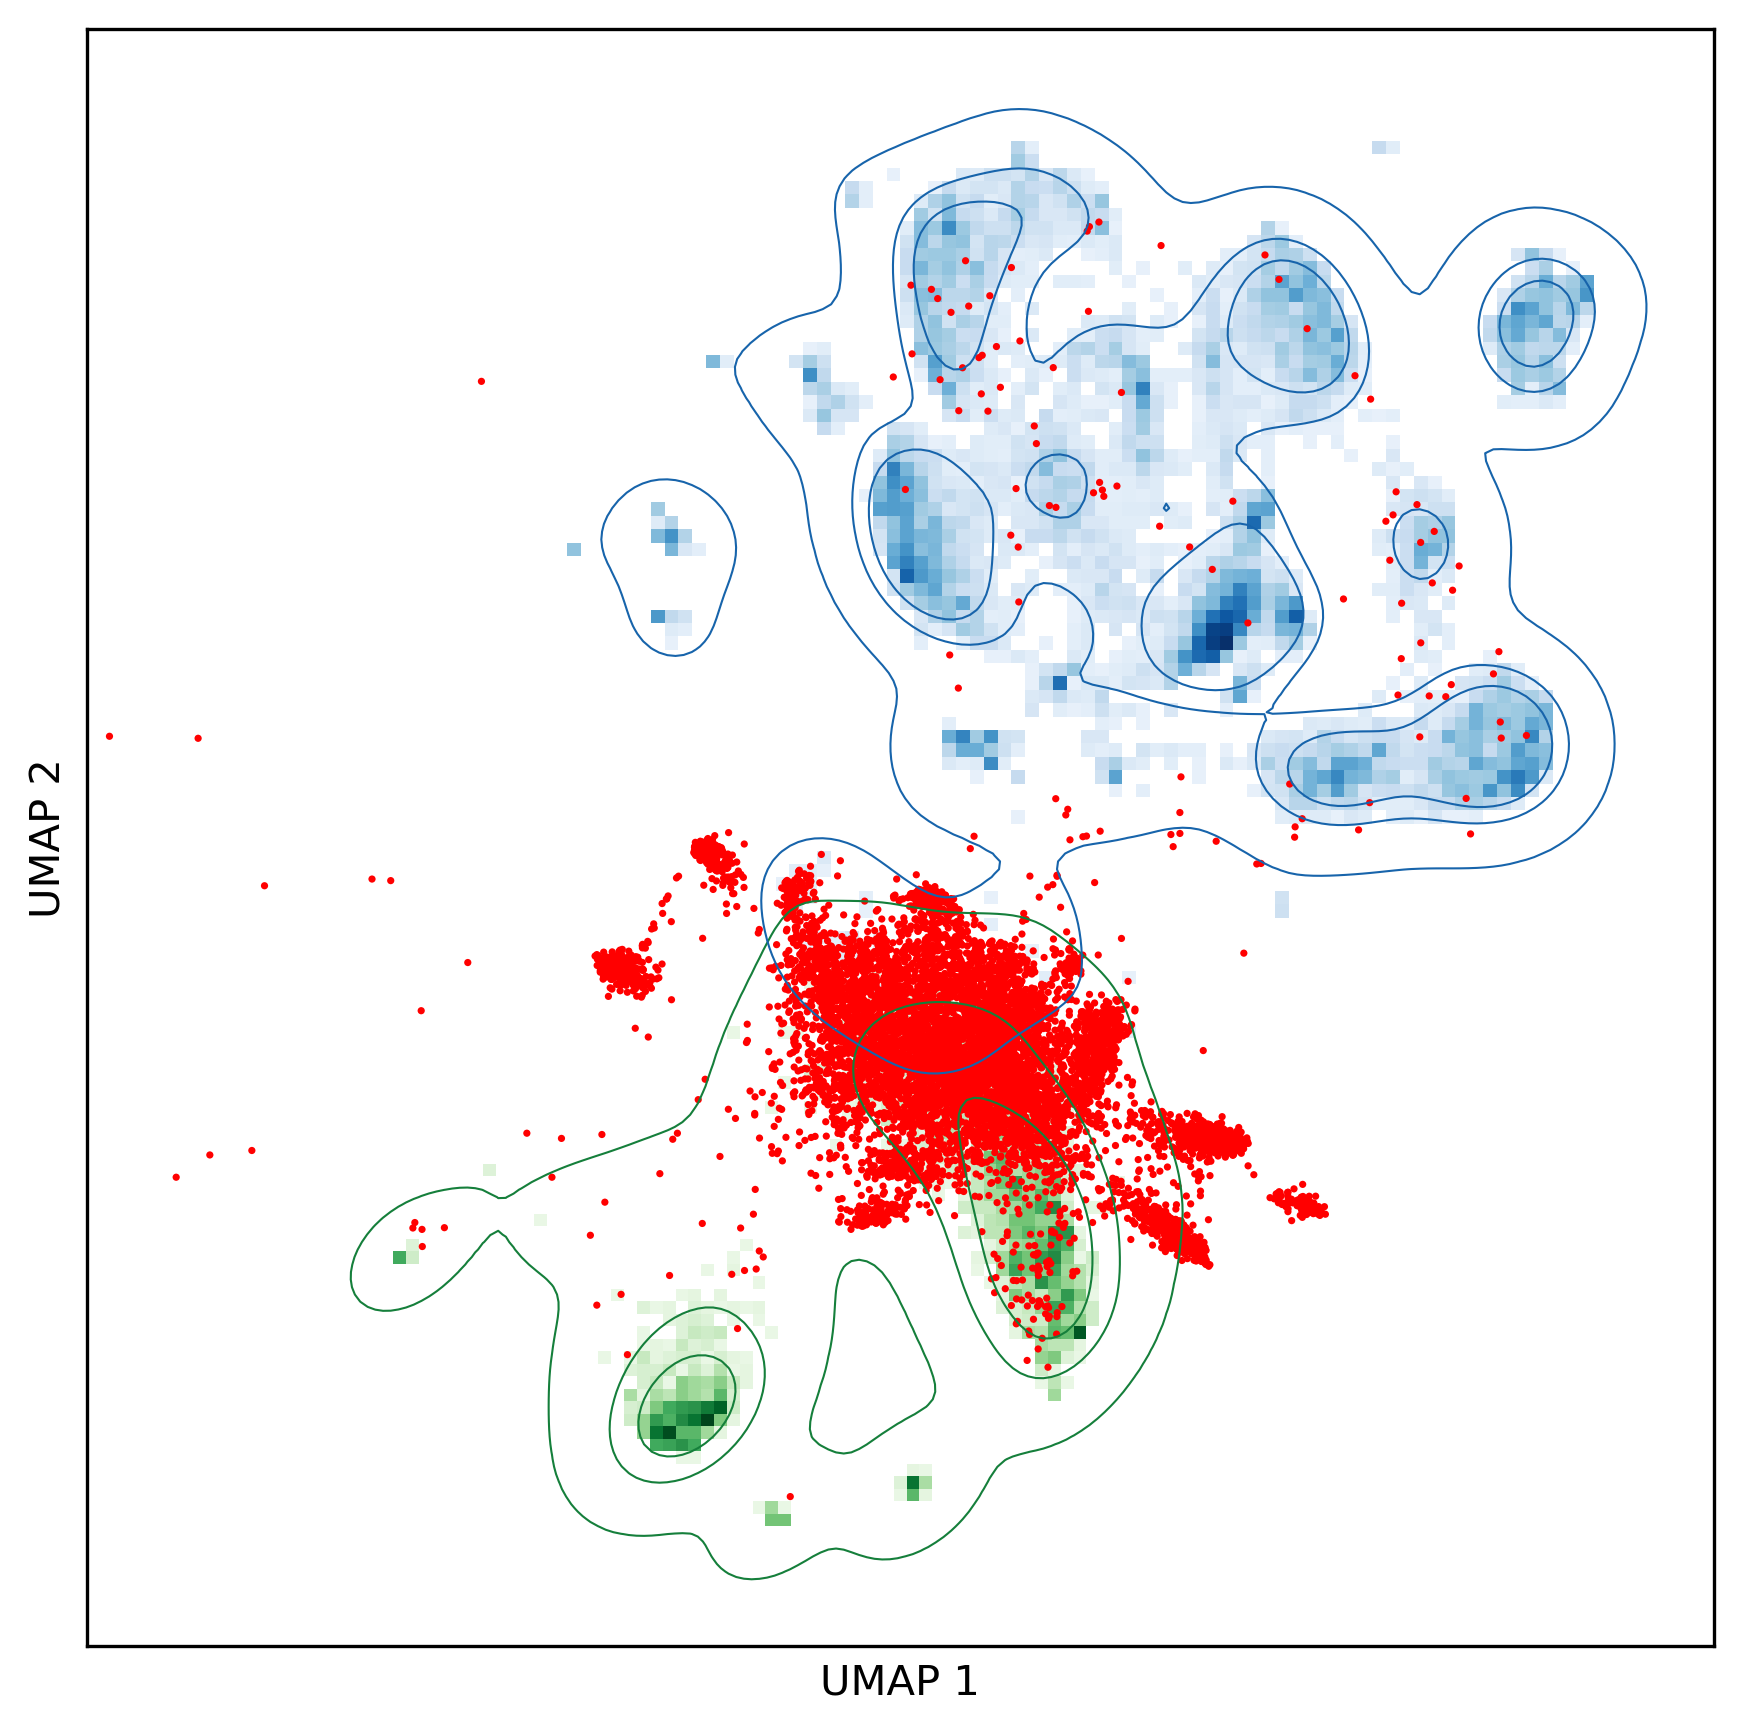

In [20]:
reload(plt2)
    
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 7, 7
plt2.plot_basin(HSC.obs, cmap='Greens')
plt2.plot_basin(FB.obs, cmap='Blues')
sns.scatterplot(data=iHSC.obs, 
               x='UMAP 1',
               y='UMAP 2',
               c='r',
               ec='none',
               s=3,
               )
plt.xticks([])
plt.yticks([])

# Distance

In [21]:
metric = 'euclidean'
n_comps = 15
X = pdf.obsm['X_pca'][:, 0:n_comps]

def min_max(v):
    return (v - v.min()) / (v.max() - v.min())

D = scipy.spatial.distance.pdist(X, metric=metric) 
# D = min_max(D)
D = scipy.spatial.distance.squareform(D)
D = pd.DataFrame(D, index=pdf.obs.index, columns=pdf.obs.index)
print(f"{D.shape=}")
D.head()

D.shape=(60257, 60257)


AAACCCAAGGTTACCT_iHSC  AAACCCAAGTTGAAGT_iHSC  \
AAACCCAAGGTTACCT_iHSC               0.000000               3.143683   
AAACCCAAGTTGAAGT_iHSC               3.143683               0.000000   
AAACCCAAGTTGTCGT_iHSC               4.579321               3.086204   
AAACCCACAGAAGCGT_iHSC               3.590177               3.422772   
AAACCCACAGGAGGTT_iHSC               3.182457               2.016906   

                       AAACCCAAGTTGTCGT_iHSC  AAACCCACAGAAGCGT_iHSC  \
AAACCCAAGGTTACCT_iHSC               4.579321               3.590177   
AAACCCAAGTTGAAGT_iHSC               3.086204               3.422772   
AAACCCAAGTTGTCGT_iHSC               0.000000               4.966650   
AAACCCACAGAAGCGT_iHSC               4.966650               0.000000   
AAACCCACAGGAGGTT_iHSC               3.416569               3.618247   

                       AAACCCACAGGAGGTT_iHSC  AAACCCAGTACCTAAC_iHSC  \
AAACCCAAGGTTACCT_iHSC               3.182457               4.180666   
AAACCCAAGTTGAAGT_iHSC               2.016906               2.308781   
AAACCCAAGTTGTCGT_iHSC               3.416569               3.337022   
AAACCCACAGAAGCGT_iHSC               3.618247               4.076378   
AAACCCACAGGAGGTT_iHSC               0.000000               2.724901   

                       AAACCCATCAGGACGA_iHSC  AAACCCATCTTACGGA_iHSC  \
AAACCCAAGGTTACCT_iHSC               3.032173               3.861131   
AAACCCAAGTTGAAGT_iHSC               2.493002               4.556121   
AAACCCAAGTTGTCGT_iHSC               3.514653               4.669491   
AAACCCACAGAAGCGT_iHSC               3.692337               5.600373   
AAACCCACAGGAGGTT_iHSC               2.232704               4.146158   

                       AAACGAAAGATACAGT_iHSC  AAACGAACAGCGAACA_iHSC  ...  \
AAACCCAAGGTTACCT_iHSC               4.193718               4.211030  ...   
AAACCCAAGTTGAAGT_iHSC               2.852173               3.112384  ...   
AAACCCAAGTTGTCGT_iHSC               3.614430               3.593694  ...   
AAACCCACAGAAGCGT_iHSC               3.525657               3.315071  ...   
AAACCCACAGGAGGTT_iHSC               3.074531               2.455079  ...   

                       TTTGTCCCATTGTCCT-3_young2_HSC  \
AAACCCAAGGTTACCT_iHSC                       5.158288   
AAACCCAAGTTGAAGT_iHSC                       3.495730   
AAACCCAAGTTGTCGT_iHSC                       5.428067   
AAACCCACAGAAGCGT_iHSC                       4.356838   
AAACCCACAGGAGGTT_iHSC                       3.275865   

                       TTTGTCTAGCAAGGGT-2_young2_HSC  \
AAACCCAAGGTTACCT_iHSC                       4.210629   
AAACCCAAGTTGAAGT_iHSC                       2.779290   
AAACCCAAGTTGTCGT_iHSC                       3.943581   
AAACCCACAGAAGCGT_iHSC                       3.334403   
AAACCCACAGGAGGTT_iHSC                       2.956870   

                       TTTGTGAAGCCTAATA-3_young2_HSC  \
AAACCCAAGGTTACCT_iHSC                       4.421461   
AAACCCAAGTTGAAGT_iHSC                       3.494261   
AAACCCAAGTTGTCGT_iHSC                       4.199840   
AAACCCACAGAAGCGT_iHSC                       3.408701   
AAACCCACAGGAGGTT_iHSC                       3.336774   

                       TTTGTGGCACACCAAC-3_young2_HSC  \
AAACCCAAGGTTACCT_iHSC                       4.827026   
AAACCCAAGTTGAAGT_iHSC                       3.716840   
AAACCCAAGTTGTCGT_iHSC                       4.756461   
AAACCCACAGAAGCGT_iHSC                       3.920110   
AAACCCACAGGAGGTT_iHSC                       3.740667   

                       TTTGTGGCATAGCAGG-3_young2_HSC  \
AAACCCAAGGTTACCT_iHSC                       3.708526   
AAACCCAAGTTGAAGT_iHSC                       3.195568   
AAACCCAAGTTGTCGT_iHSC                       3.488420   
AAACCCACAGAAGCGT_iHSC                       3.571624   
AAACCCACAGGAGGTT_iHSC                       3.150718   

                       TTTGTGGCATCTAGCA-2_young2_HSC  \
AAACCCAAGGTTACCT_iHSC                       4.284531   
AAACCCAAGTTGAAGT_iHSC                       3.399242   
AAACC

In [22]:
def calculate_mean_group_distances(D, pdf, group_col='group'):
    """Calculates mean pairwise distances between groups in a distance matrix.

    Args:
        D (pd.DataFrame): Pairwise distance matrix with index and columns matching pdf.obs.index.
        pdf (anndata.AnnData): Annotated data object containing the grouping column.
        group_col (str, optional): The column name in `pdf.obs` specifying the groups (default is 'group').

    Returns:
        pd.DataFrame: A pivot table with mean pairwise distances between groups.
    """
    results = []
    
    for i_name, group_i in pdf.obs.groupby(group_col):
        for j_name, group_j in pdf.obs.groupby(group_col):
            i_idx = group_i.index
            j_idx = group_j.index
        
            mean_dist = np.mean(D.loc[i_idx][j_idx].to_numpy())
        
            row = {
                'i_name' : i_name,
                'j_name' : j_name,
                'mean_dist' : mean_dist,
            }
        
            results.append(row)
            
    results = pd.DataFrame(results)
    results = pd.pivot_table(results, 
                     index='i_name', 
                     columns='j_name', 
                     values='mean_dist')
    return results


means = calculate_mean_group_distances(D, pdf, group_col='broad_type')
means.head()

/tmp/ipykernel_202581/3082547315.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i_name, group_i in pdf.obs.groupby(group_col):
/tmp/ipykernel_202581/3082547315.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for j_name, group_j in pdf.obs.groupby(group_col):


j_name           CMP  Fibroblast       GMP       HSC    LinNeg       MEP  \
i_name                                                                     
CMP         4.741340    6.689198  6.261851  5.421896  7.528998  5.424507   
Fibroblast  6.689198    6.099942  7.323581  6.405707  7.482207  6.649383   
GMP         6.261851    7.323581  5.902503  6.652322  8.066777  7.050600   
HSC         5.421896    6.405707  6.652322  5.363599  7.303543  5.740399   
LinNeg      7.528998    7.482207  8.066777  7.303543  8.035485  7.469670   

j_name           MKP       MLP       MPP    PreBNK      iHSC  
i_name                                                        
CMP         8.098048  5.435875  5.272870  6.190520  5.334483  
Fibroblast  7.784928  6.767271  6.318687  7.466486  5.566184  
GMP         7.756101  5.927165  6.582018  6.384430  6.185654  
HSC         7.417535  5.766182  5.364315  6.603579  5.080083  
LinNeg      8.296477  7.731158  7.209863  8.224468  6.534350

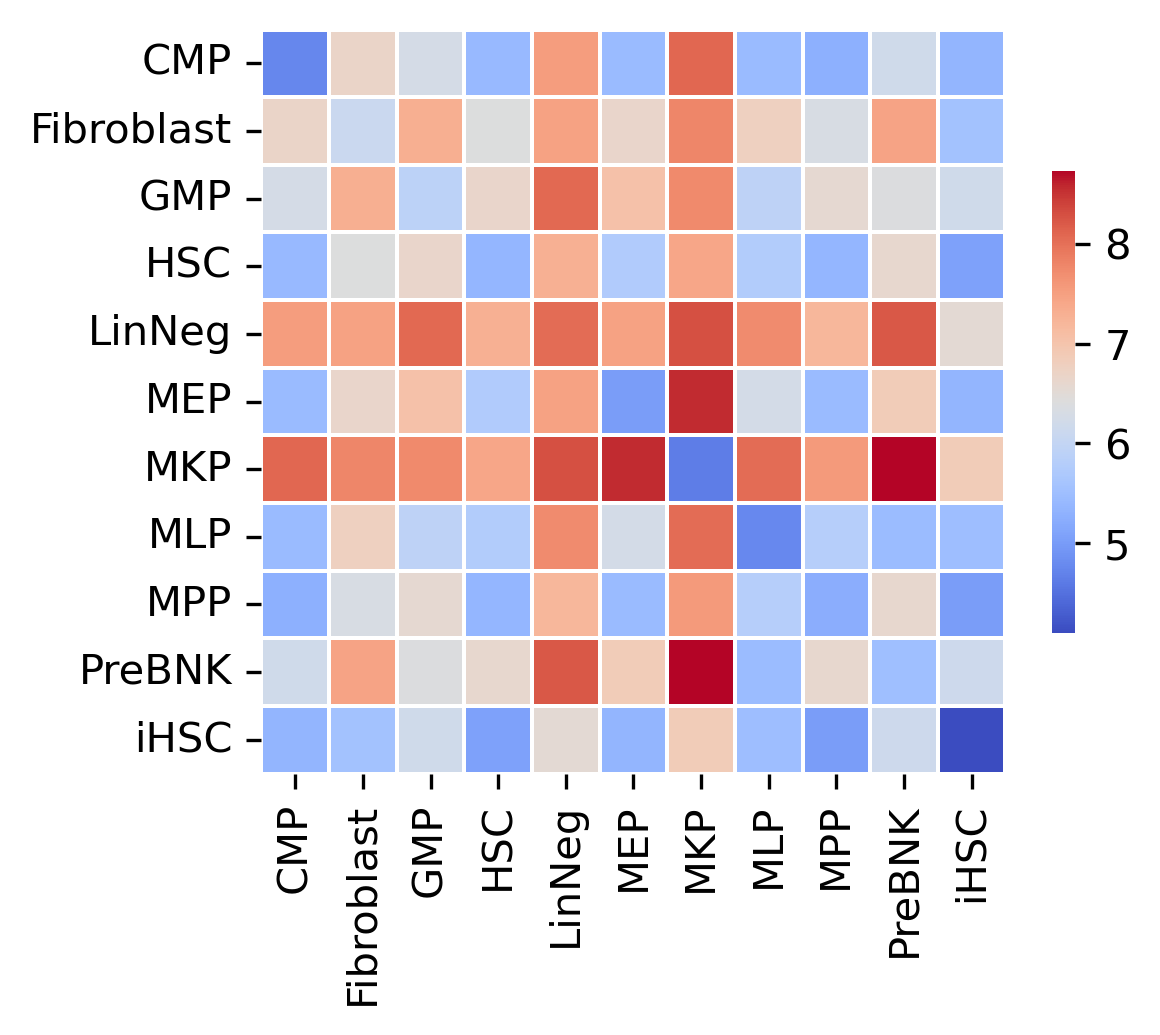

In [23]:
cmap = 'coolwarm'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 4

sns.heatmap(means, 
            square=True,
            linewidth=0.5,
            # annot=True,
            cmap=cmap,
            # fmt=".2f",
            # vmin=0,
            # vmax=1,
            cbar_kws={'shrink' : 0.5})

plt.ylabel("")
plt.xlabel("")
plt.gca().tick_params(axis='y', rotation=0)

# distribution of distances for HSC/FIB from iHSC

In [40]:
ihsc_ind = pdf.obs[pdf.obs['cell_type'] == "iHSC"].index
hsc_ind = pdf.obs[pdf.obs['cell_type'] == "HSC"].index
fb_ind = pdf.obs[pdf.obs['cell_type'] == "FB"].index

print(f"{len(ihsc_ind)=} {len(hsc_ind)=} {len(fb_ind)=}")

t = pd.DataFrame({
    'mean_distance_fb' : D.loc[ihsc_ind][fb_ind].mean(axis=1),   
    'mean_distance_hsc' : D.loc[ihsc_ind][ihsc_ind].mean(axis=1),   
})

print(f"{t.shape=}")
outpath = "/nfs/turbo/umms-indikar/shared/projects/R01/iHSC_euclidean_distance_15pcs.csv"
t = t.reset_index()
t.to_csv(outpath, index=False)
t.head()

len(ihsc_ind)=8574 len(hsc_ind)=4525 len(fb_ind)=26586
t.shape=(8574, 2)


index  mean_distance_fb  mean_distance_hsc
0  AAACCCAAGGTTACCT_iHSC          5.490288           3.984711
1  AAACCCAAGTTGAAGT_iHSC          5.246461           3.536749
2  AAACCCAAGTTGTCGT_iHSC          5.556745           4.080022
3  AAACCCACAGAAGCGT_iHSC          5.782125           4.304035
4  AAACCCACAGGAGGTT_iHSC          4.936092           3.160137

Text(0, 0.5, 'Euclidean Distance')

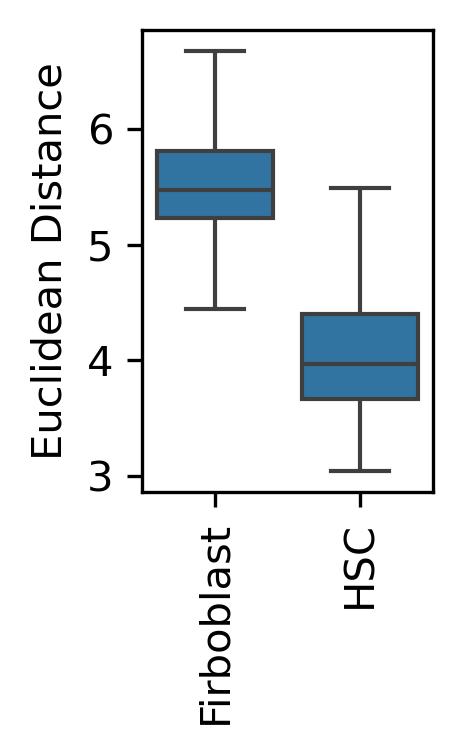

In [54]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 1.25, 2

sns.boxplot(data=pd.melt(t, id_vars='index'), 
            x='variable',
            y='value',
            showfliers=False,
           )

plt.gca().tick_params(axis='x', rotation=90)
ticks = plt.xticks() 
plt.xticks(ticks[0], ['Firboblast', "HSC"])
plt.xlabel("")
plt.ylabel("Euclidean Distance")

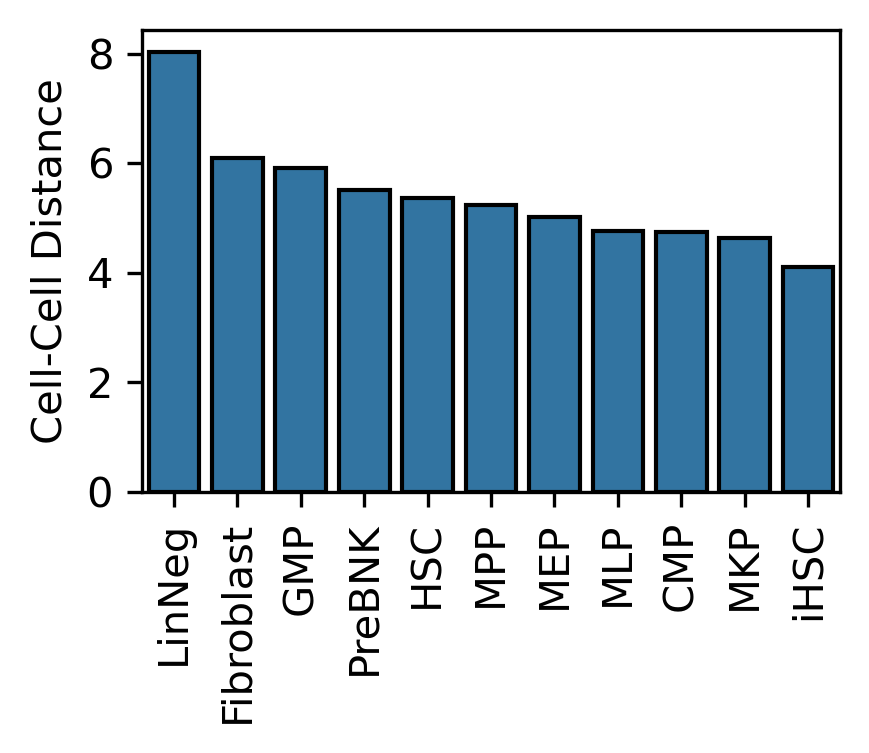

In [24]:
t = pd.DataFrame({
 'distance' : np.diag(means),   
 'cell_type' : means.index,
})

t = t.sort_values(by='distance', ascending=False)


plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 3, 2
sns.barplot(data=t, 
            x='cell_type',
            y='distance',
            ec='k'
           )

plt.ylabel('Cell-Cell Distance')
plt.xlabel('')
plt.gca().tick_params(axis='x', rotation=90)

In [ ]:
pdf.obs['Data Source'].unique()

In [ ]:
pdf.obs[pdf.obs['Data Source'] == 'Tabula Sapiens 2023']['cell_type'].unique()

# Gene Scores

In [ ]:
score_name = 'HSC Markers'
genes = [
    'GATA2', 
    'PTPRC',
    "CD34",
    "CD164", 
    'GFI1B', 
]

gene_ids = pdf.var[pdf.var['gene_name'].isin(genes)].index

sc.tl.score_genes(pdf,
                  gene_list=gene_ids, 
                  ctrl_size=len(gene_ids),
                  score_name=score_name)

pdf.obs[score_name] = pdf.obs[score_name]

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

plt2.plot_umap_scatter(pdf, 
                      s=5, 
                      cmap='coolwarm',
                      title='HSC Genes',
                      vmin=-1,
                      vmax=1,
                      color=score_name)

In [ ]:
break

In [ ]:
iHSC = pdf[pdf.obs['broad_type'] == 'iHSC', :]
HSC = pdf[pdf.obs['broad_type'] == 'HSC', :]
FB = pdf[pdf.obs['broad_type'] == 'Fibroblast', :]

print(f"{iHSC.obsm['X_pca'].shape=} {HSC.obsm['X_pca'].shape=} {FB.obsm['X_pca'].shape=}")

In [ ]:
metric = 'euclidean'

D2FB = scipy.spatial.distance.cdist(iHSC.obsm['X_pca'], 
                                    FB.obsm['X_pca'], 
                                    metric=metric
                                   )

D2HSC = scipy.spatial.distance.cdist(iHSC.obsm['X_pca'],
                                     HSC.obsm['X_pca'], 
                                     metric=metric
                                    )

print(f"{D2FB.shape=}")
print(f"{D2HSC.shape=}")

dist = pd.DataFrame({
    'distance_2_fb' :  D2FB.mean(axis=1),
    'distance_2_hsc' : D2HSC.mean(axis=1),
})


dist.index = iHSC.obs.index

dist.head()

In [ ]:
def calculate_relative_position(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Calculates the relative position of values in two vectors on a scale of -1 to 1.

    Args:
        x: A numpy array with values between 0 and -n.
        y: A numpy array with values between 0 and m.

    Returns:
        A numpy array of relative positions between -1 and 1.
    """

    # Ensure vectors are of the same length
    if len(x) != len(y):
        raise ValueError("Input vectors must have the same length.")

    # Normalize x and y to the range [-1, 1]
    x_normalized = x / abs(x.min())  
    y_normalized = y / y.max()

    # Calculate relative positions
    relative_positions = (x_normalized + y_normalized) / 2

    return relative_positions

def continuum(df: pd.DataFrame, dist_col1: str, dist_col2: str, decay_factor: float = 1.0) -> pd.Series:
    """Plots cells along a continuum based on exponential decay of two distance columns.

    Args:
        df: A DataFrame containing the distance columns.
        dist_col1: The name of the first distance column.
        dist_col2: The name of the second distance column.
        decay_factor: The factor controlling the exponential decay rate.

    Returns:
        A Series with the cell_id as index and the continuum position as values.
    """
    # Exponential decay calculation
    x = np.exp(-decay_factor * df[dist_col1])
    y = np.exp(-decay_factor * df[dist_col2])

    # Calculate continuum positions
    continuum_positions = calculate_relative_position(x, y)
    continuum_positions = pd.Series(continuum_positions, index=df.index)
    return continuum_positions.sort_values()
    
    
cont = continuum(dist, 
                 dist_col1='distance_2_fb', 
                 dist_col2='distance_2_hsc')   

cont.max()
# sns.histplot(cont)

In [ ]:
break

In [ ]:
dist.columns

# Plot the basins

In [ ]:
def plot_basin(df, x='UMAP 1', y='UMAP 2', cmap="Reds", bins=100, pthresh=.1, levels=4):
    """
    Plots a basin based on UMAP dimensionality reduction, combining scatter, 2D histogram, and density contours with automatic color selection.

    Args:
        df (pandas.DataFrame): The dataframe containing the UMAP coordinates.
        x (str): The column name for the x-axis ('UMAP 1' by default).
        y (str): The column name for the y-axis ('UMAP 2' by default).
        cmap (str): The colormap for the 2D histogram ("Reds" by default).
        bins (int): The number of bins for the 2D histogram (100 by default).
        pthresh (float): The percentile threshold for the 2D histogram (0.1 by default).
        levels (int): The number of contour levels for the density plot (4 by default).
    """

    # 2D Histogram: Shows density distribution
    sns.histplot(data=df, x=x, y=y, bins=bins, pthresh=pthresh, cmap=cmap)

    # Determine Color for Contours based on colormap
    cmap_obj = plt.cm.get_cmap(cmap)  # Get the colormap object
    contour_color = cmap_obj(0.8)  # Choose a color towards the end of the colormap
    
    # 3. Density Contours: Smoothly outlines areas of high density
    sns.kdeplot(data=df, x=x, y=y, levels=levels, color=contour_color, linewidths=0.5)
    
    
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 7, 7
plot_basin(HSC.obs, cmap='Greens')
plot_basin(FB.obs, cmap='Blues')
sns.scatterplot(data=iHSC.obs, 
               x='UMAP 1',
               y='UMAP 2',
               c='r',
               ec='none',
               s=0.25,
               )
plt.xticks([])
plt.yticks([])

In [ ]:
def plot_density_basin(df, x='UMAP 1', y='UMAP 2', cmap="Reds", bins=500, pthresh=.1, alpha_max=0.8):
    """
    Plots a basin based on UMAP dimensionality reduction, combining scatter, 2D histogram, and fading density representation.

    Args:
        df (pandas.DataFrame): The dataframe containing the UMAP coordinates.
        x (str): The column name for the x-axis ('UMAP 1' by default).
        y (str): The column name for the y-axis ('UMAP 2' by default).
        cmap (str): The colormap for the 2D histogram ("Reds" by default).
        bins (int): The number of bins for the 2D histogram (100 by default).
        pthresh (float): The percentile threshold for the 2D histogram (0.1 by default).
        alpha_max (float): The maximum alpha value for the density plot (0.8 by default).
    """
    #Calculate density
    x_values = df[x]
    y_values = df[y]
    xx, yy = np.mgrid[x_values.min():x_values.max():100j, y_values.min():y_values.max():100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x_values, y_values])
    kernel = scipy.stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    # 2D Histogram: Shows density distribution
    sns.histplot(data=df, x=x, y=y, bins=bins, pthresh=pthresh, cmap=cmap)

    # Fading Density Representation:
    plt.imshow(np.rot90(f), 
               cmap=cmap, 
               alpha=alpha_max, 
               extent=[x_values.min(), x_values.max(), y_values.min(), y_values.max()])
    
    
plot_density_basin(HSC.obs)
plot_density_basin(FB.obs, cmap='Blues')

In [ ]:
break

# Pseudotime

In [ ]:
mask = (pdf.obs['cell_type'] != 'FB')
hdf = pdf[mask, :].copy()

sc.pp.combat(hdf, key='dataset')

# handle negatives
hdf.X = np.where(hdf.X < 0, 0, hdf.X)

# reprocess
sc.pp.highly_variable_genes(hdf, n_top_genes=2000)

sc.tl.pca(hdf)
sc.pp.neighbors(hdf)
sc.tl.umap(hdf) 

hdf

In [ ]:
sc.pl.umap(hdf,
           color=['cell_type', 'dataset'],
           s=50)

In [ ]:
root_type = "HSC"
hdf.uns['iroot'] = np.flatnonzero(hdf.obs['cell_type'] == root_type)[0]

sc.tl.diffmap(hdf, n_comps=21)
sc.pp.neighbors(hdf, n_neighbors=7)
sc.tl.dpt(hdf, n_branchings=0)

hdf

In [ ]:
sc.pl.umap(hdf,
           color='dpt_pseudotime',
           vmin=0, 
           vmax=0.5,
           s=50)

In [ ]:
break

In [ ]:
break